In [5]:

import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython.display import display, HTML
import cv2
    

In [3]:

student_id = "61375017H"
student_name = "Vincent Chen"
print("STUDENT ID", student_id)
print("STUDENT NAME", student_name)


STUDENT ID 61375017H
STUDENT NAME Vincent Chen


<!-- <div class="question_frame"> --><!-- start of question_frame -->



<h1>Cell Detection and Analysis - Color Predicate</h1>
<div class="question_body">

<p>A friend of yours from the Biology departments asks you to help him in analyzing several images of
alien cell cultures, that were retrived from an ancient underground lake in Alaska. The cell cultures
show up as bright areas under a microscope. Surprisingly, the cell cultures look strange - each cell
is brighter than the background and seems to consist of a cluster of rectangluar blobs connected by at
least one pixel in the horizontal or vertical direction. Two cell pixels that touch only along a diagonal
must be counted as seperate cells. Some sample images are shown in the image below.
</p>


<table " >

<tbody>

<tr>

<td>


<a download="cell_cultures_1.png" href="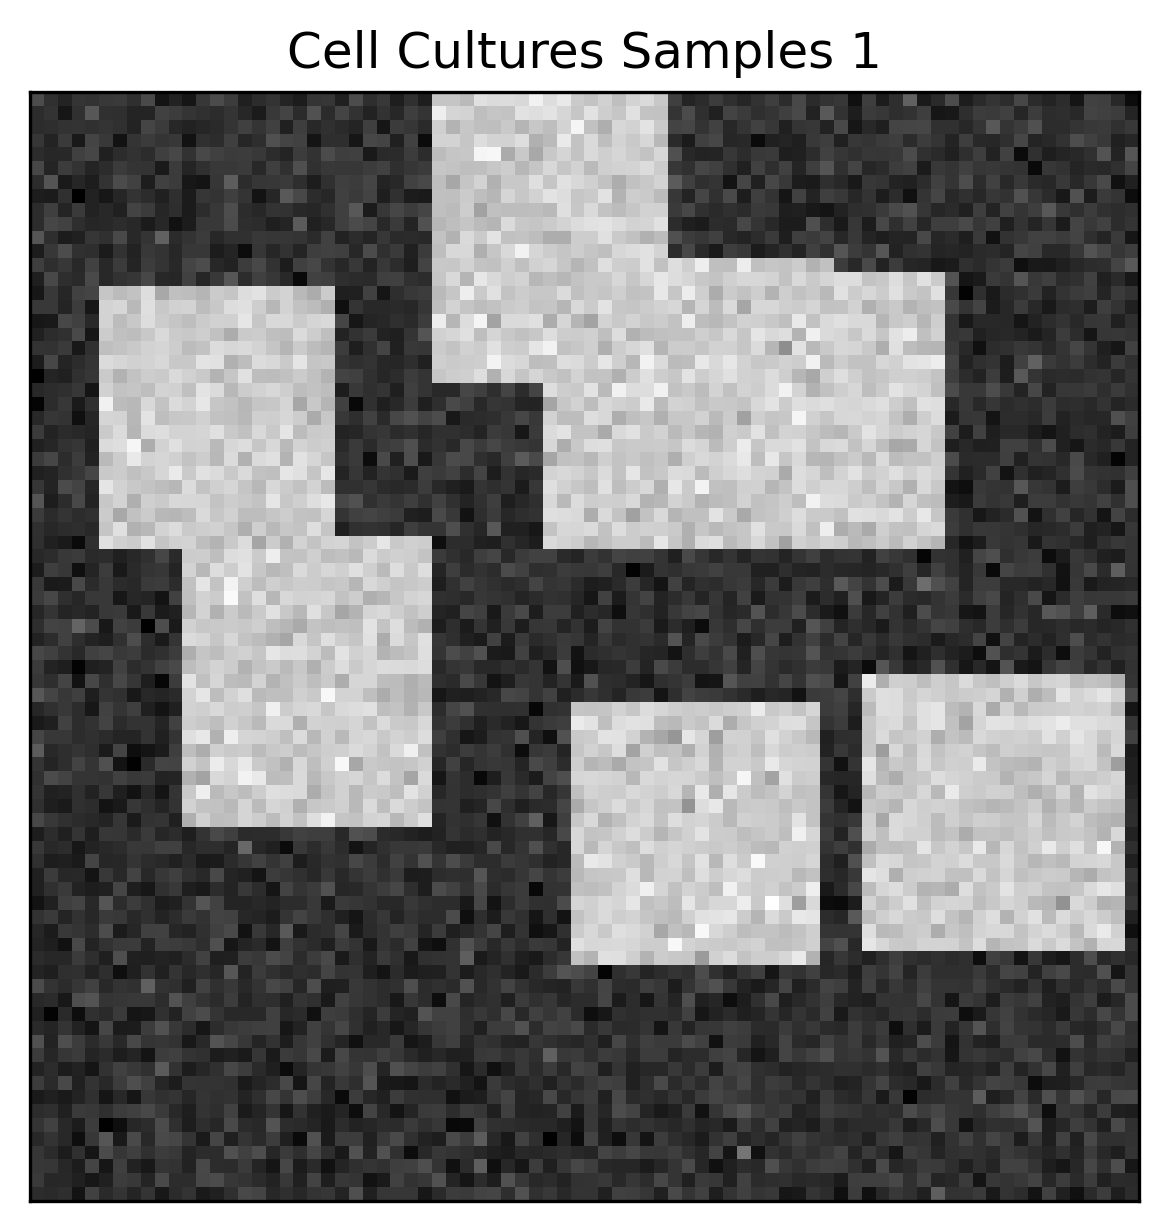">


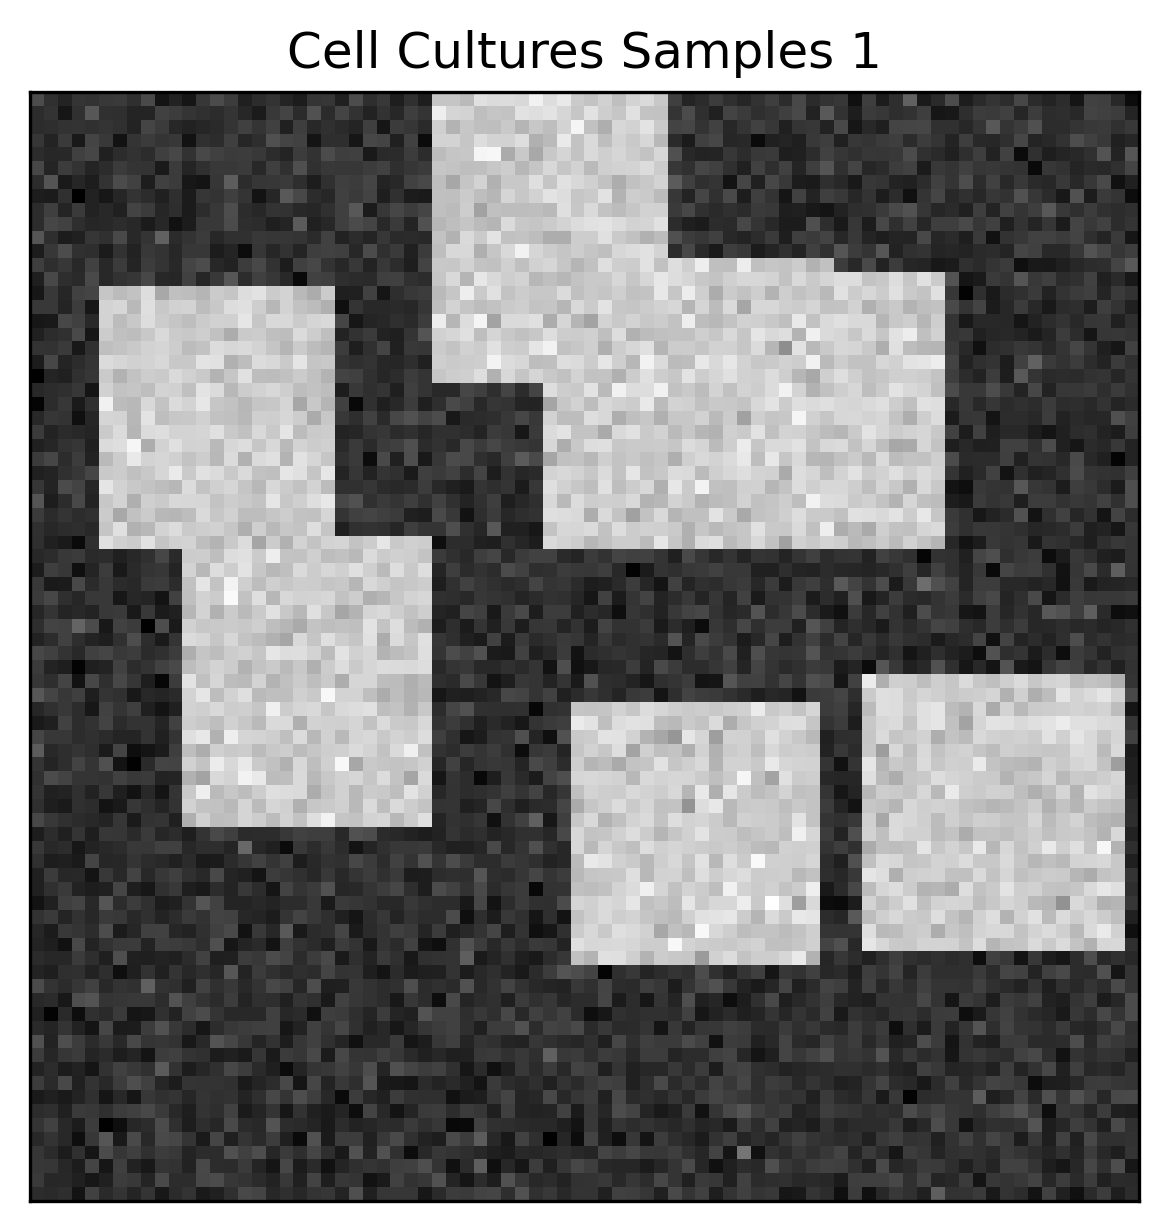

</a>

</td>

<td>


<a download="cell_cultures_2.png" href="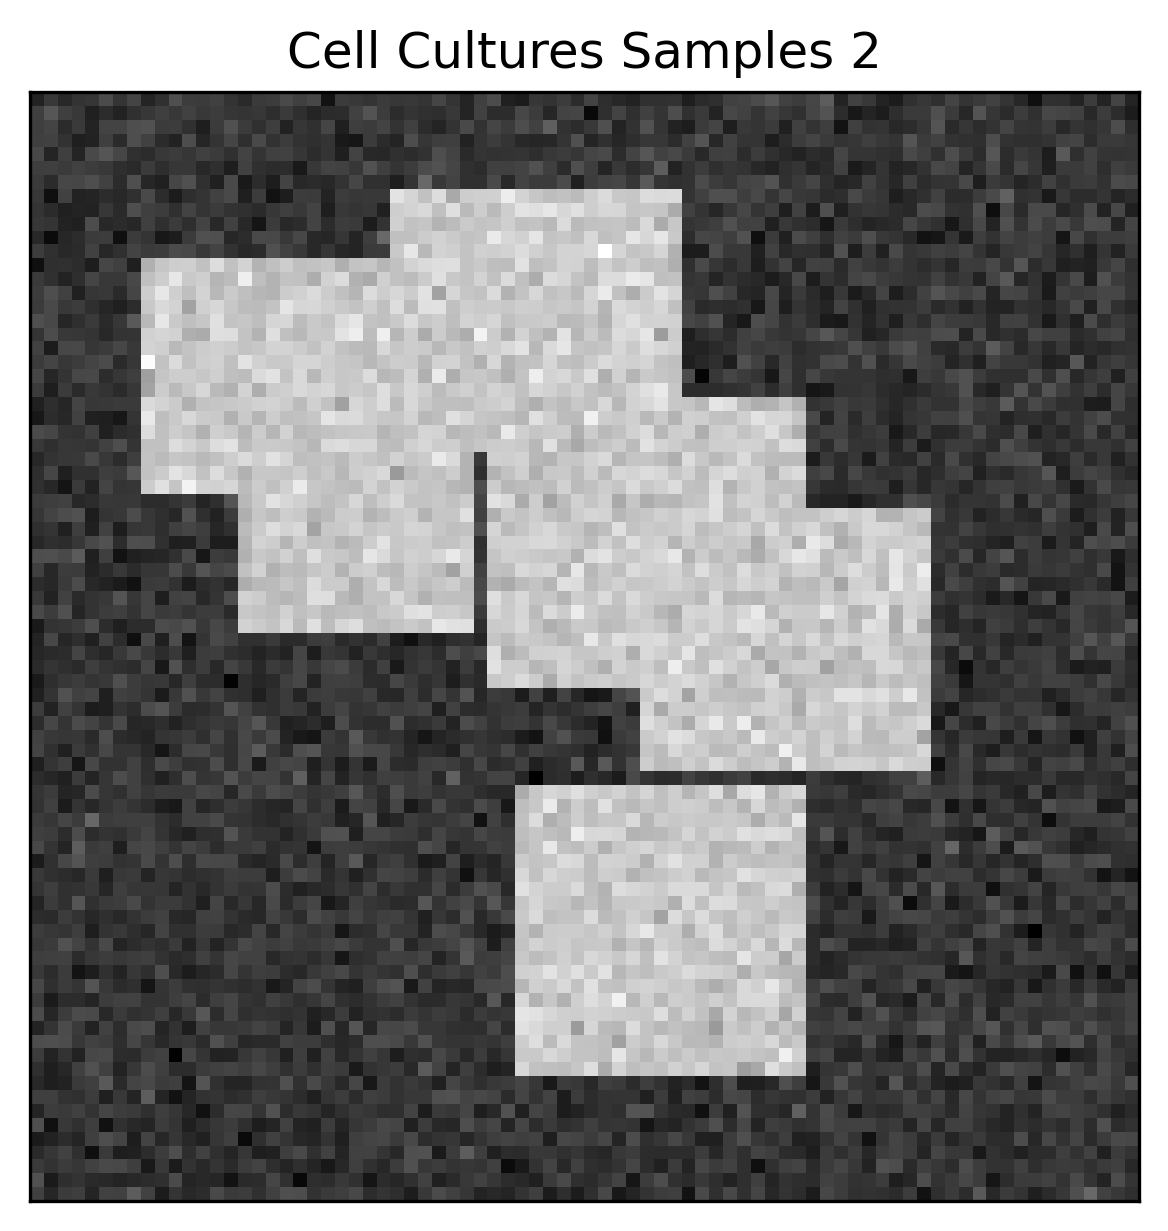">


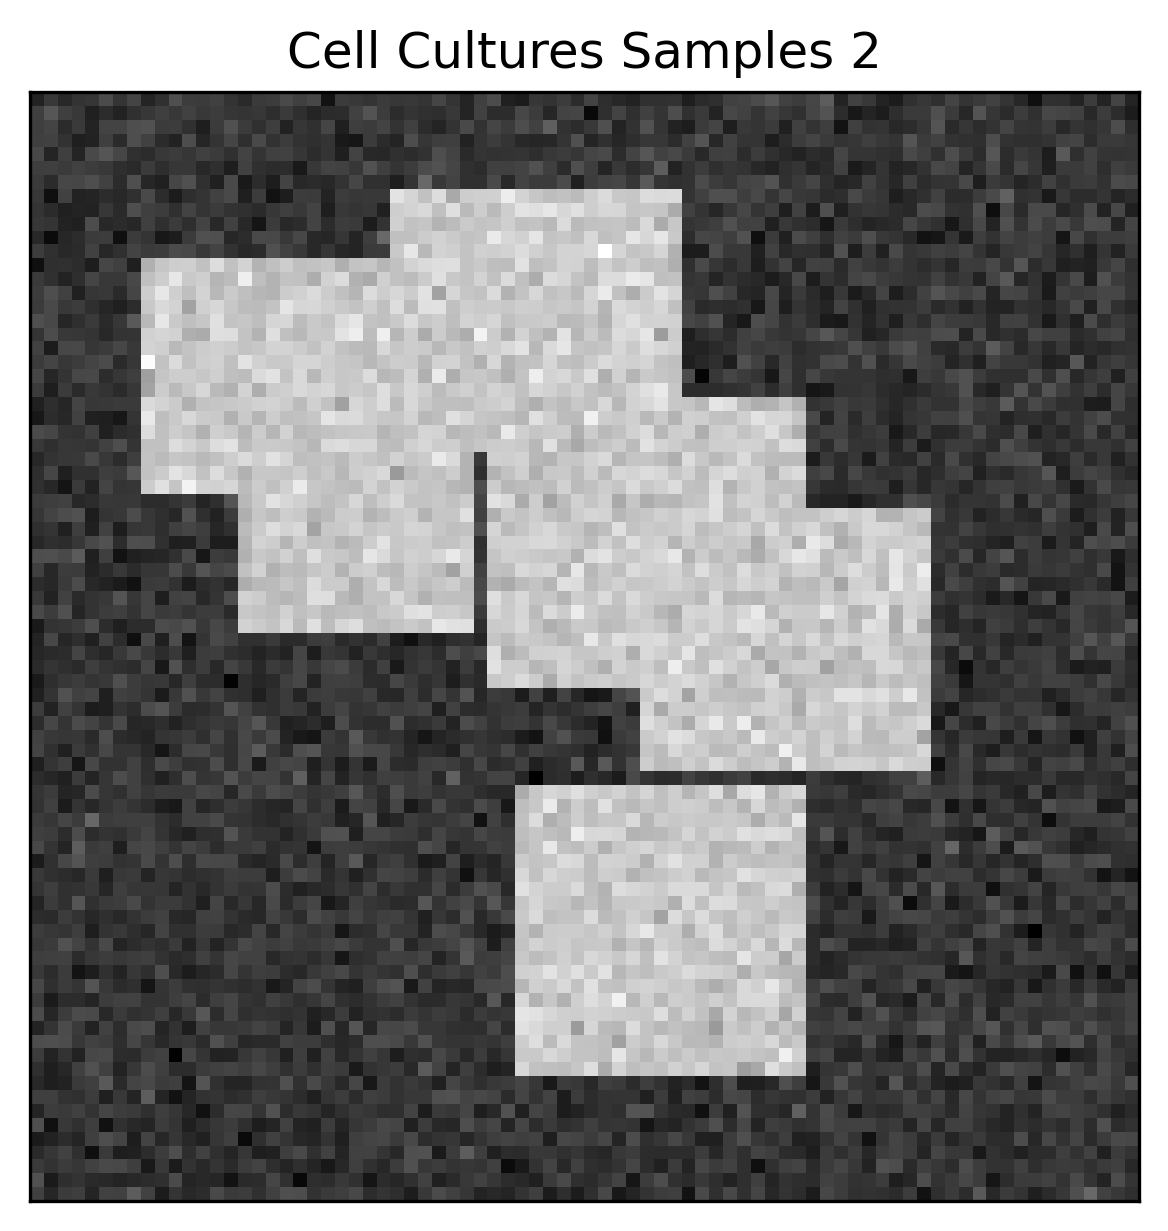

</a>

</td>

<td>


<a download="cell_cultures_3.png" href="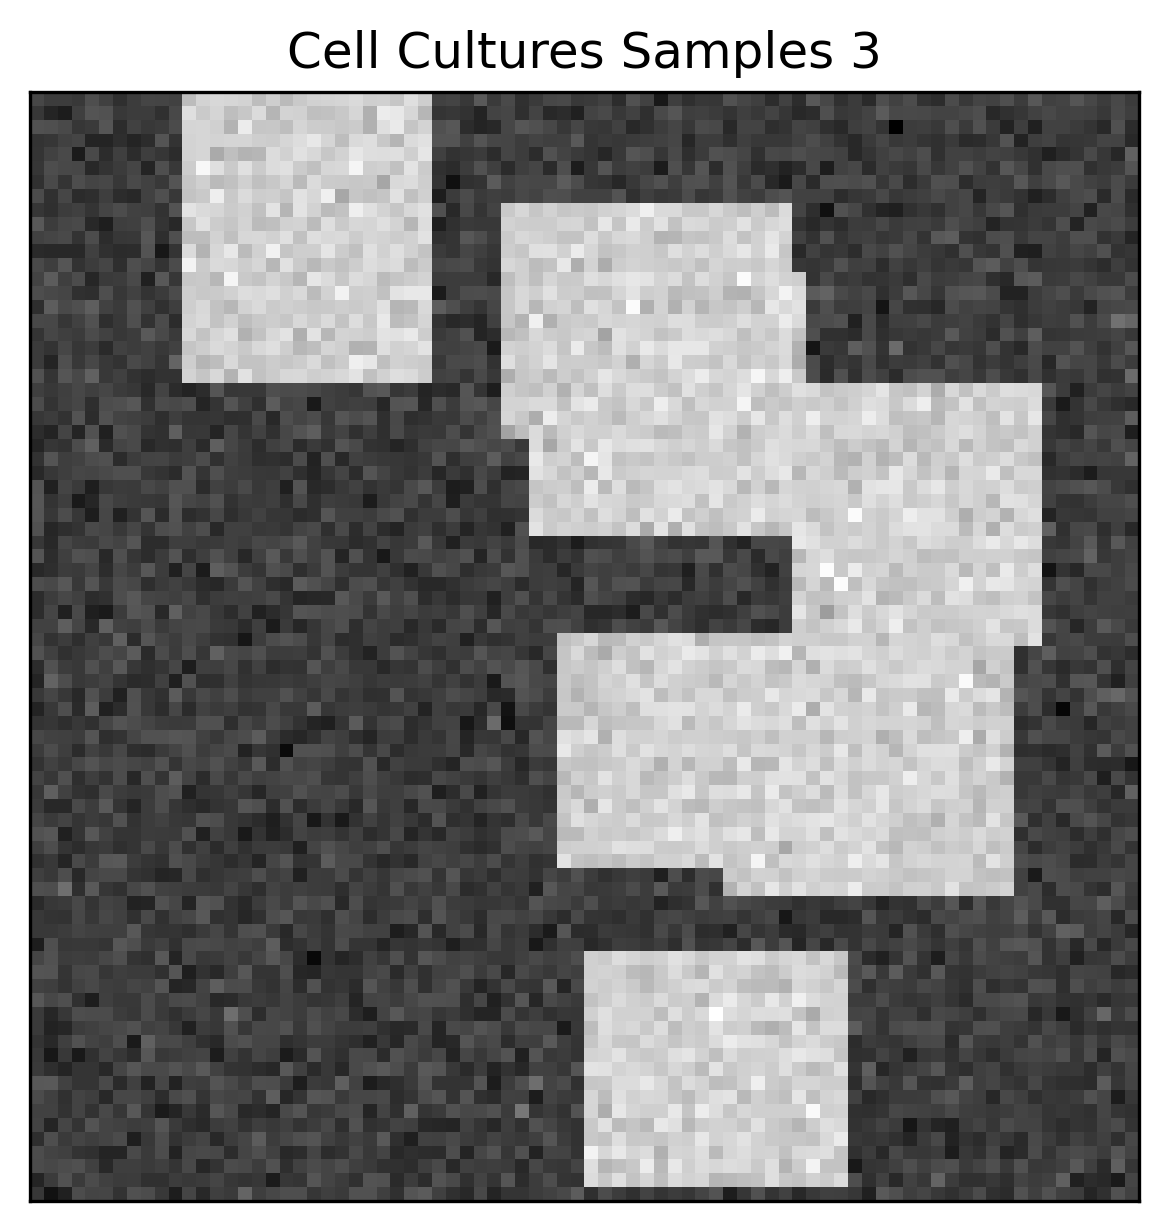">


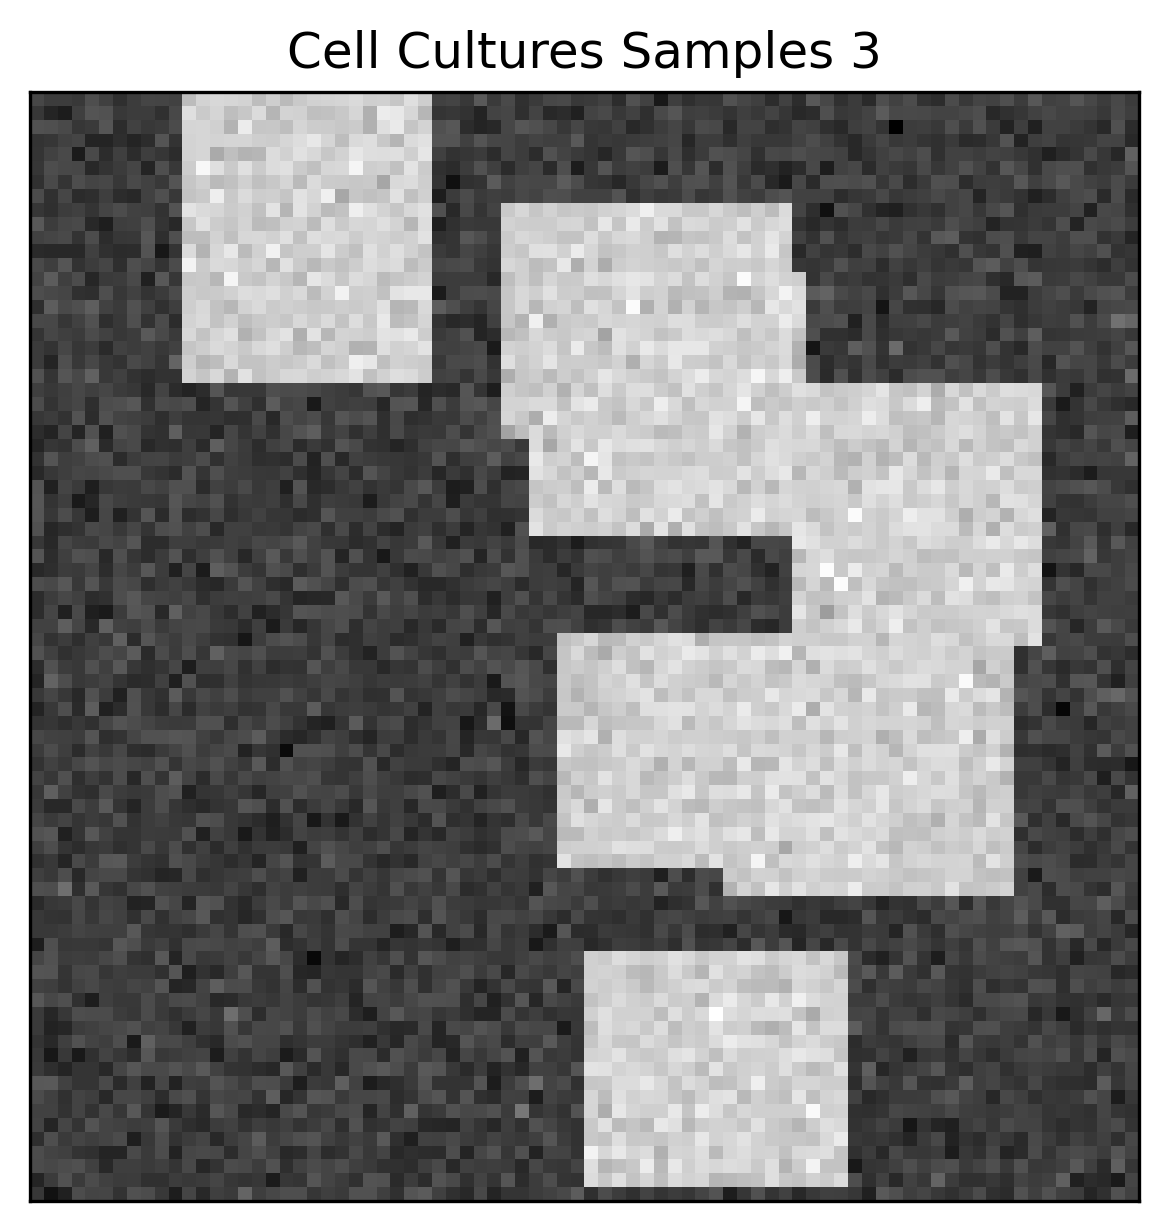

</a>

</td>

</tr>

</tbody>
</table>


<p>As you can see, there is quite a bit of noise in the images taken by the microscope.</p>

<p>
Your look at the images and decide that your first step is to
distinguish pixels of cell cultures from background pixels.
</p>

<p>
Implement a program that highlights and counts all pixels that belong to
cell cultures.
</p>

</div><!-- end of question_body -->



<div class="question_marks">
<span class="mark_num" style="text-align:right">10</span> marks
</div><!-- end of question_marks -->



<p>Count the number of cell pixels in an image.
The following shows the answers for the three sample images from above.</p>


<table " >

<tbody>

<tr>

<td>


<a download="cell_cultures_pixels_1.png" href="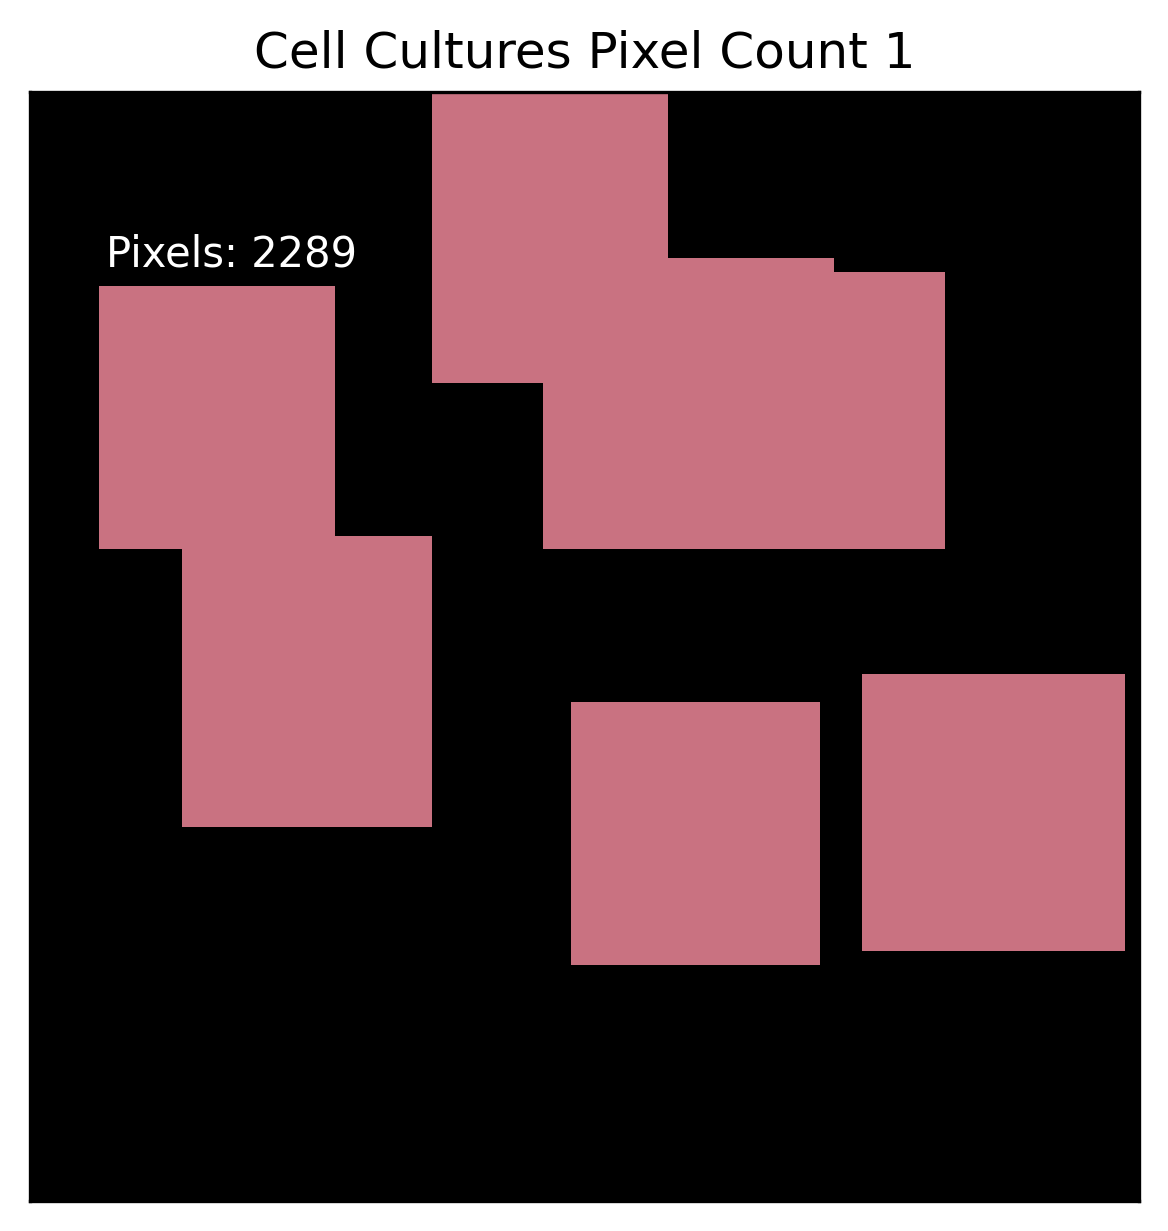">


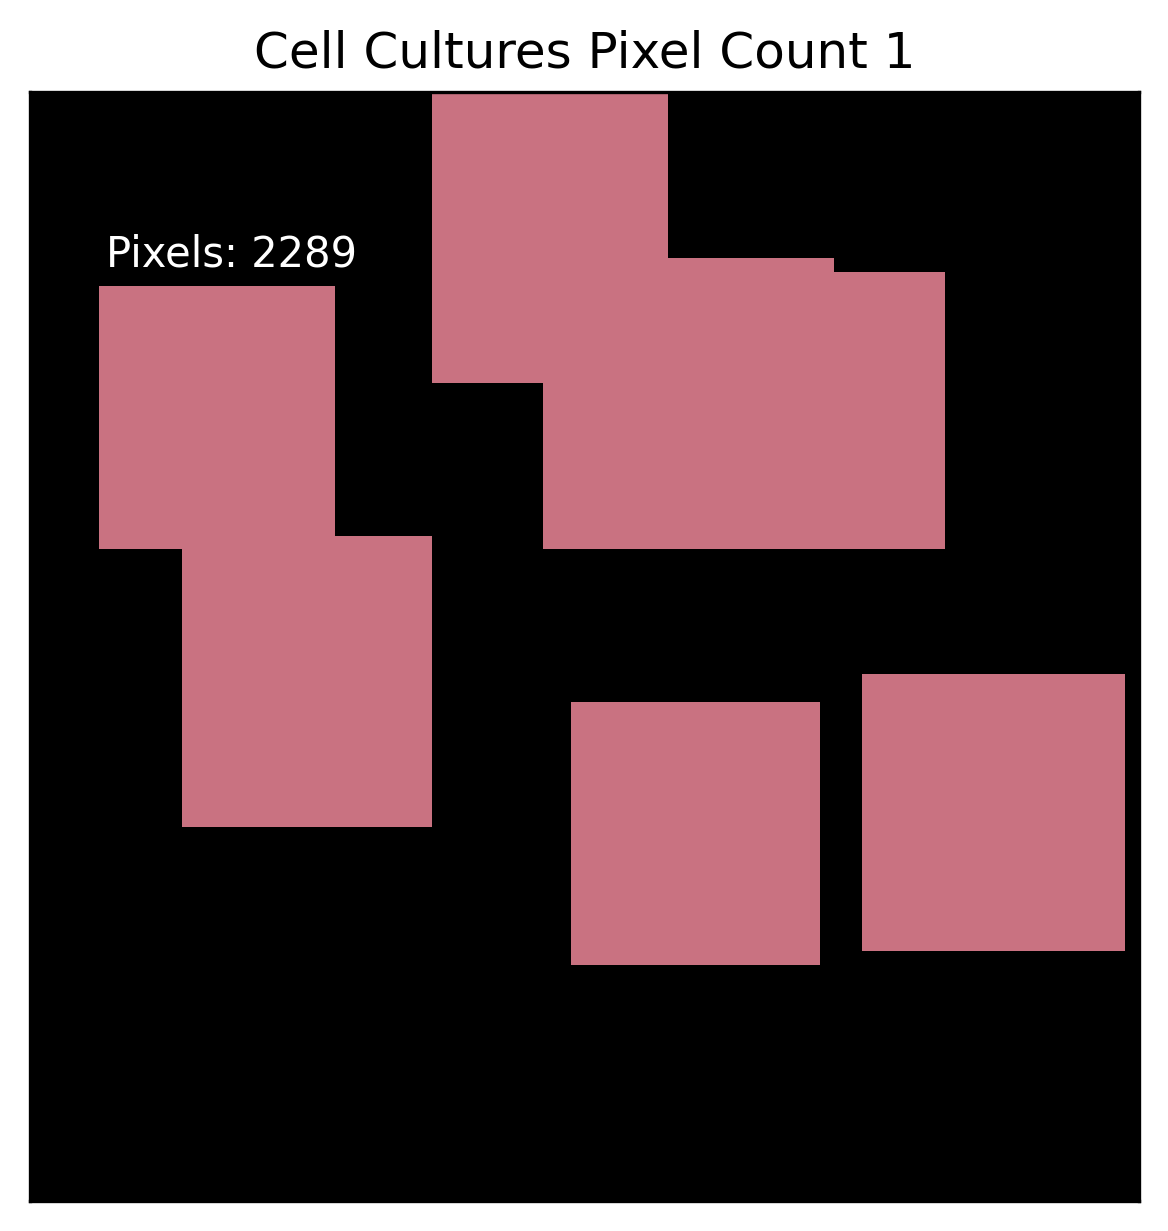

</a>

</td>

<td>


<a download="cell_cultures_pixels_2.png" href="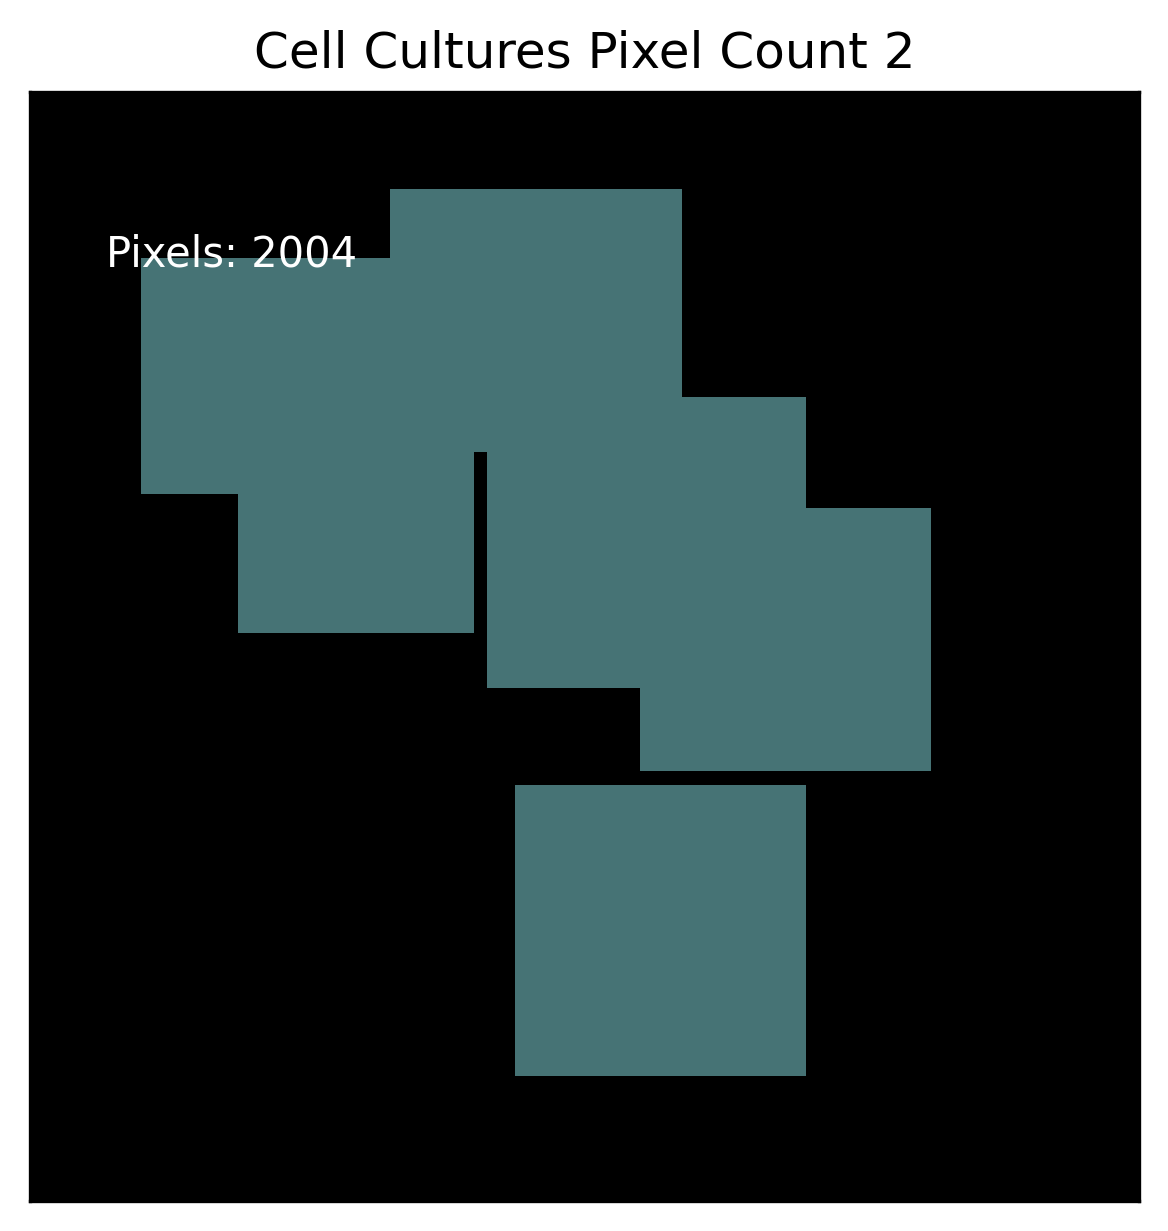">


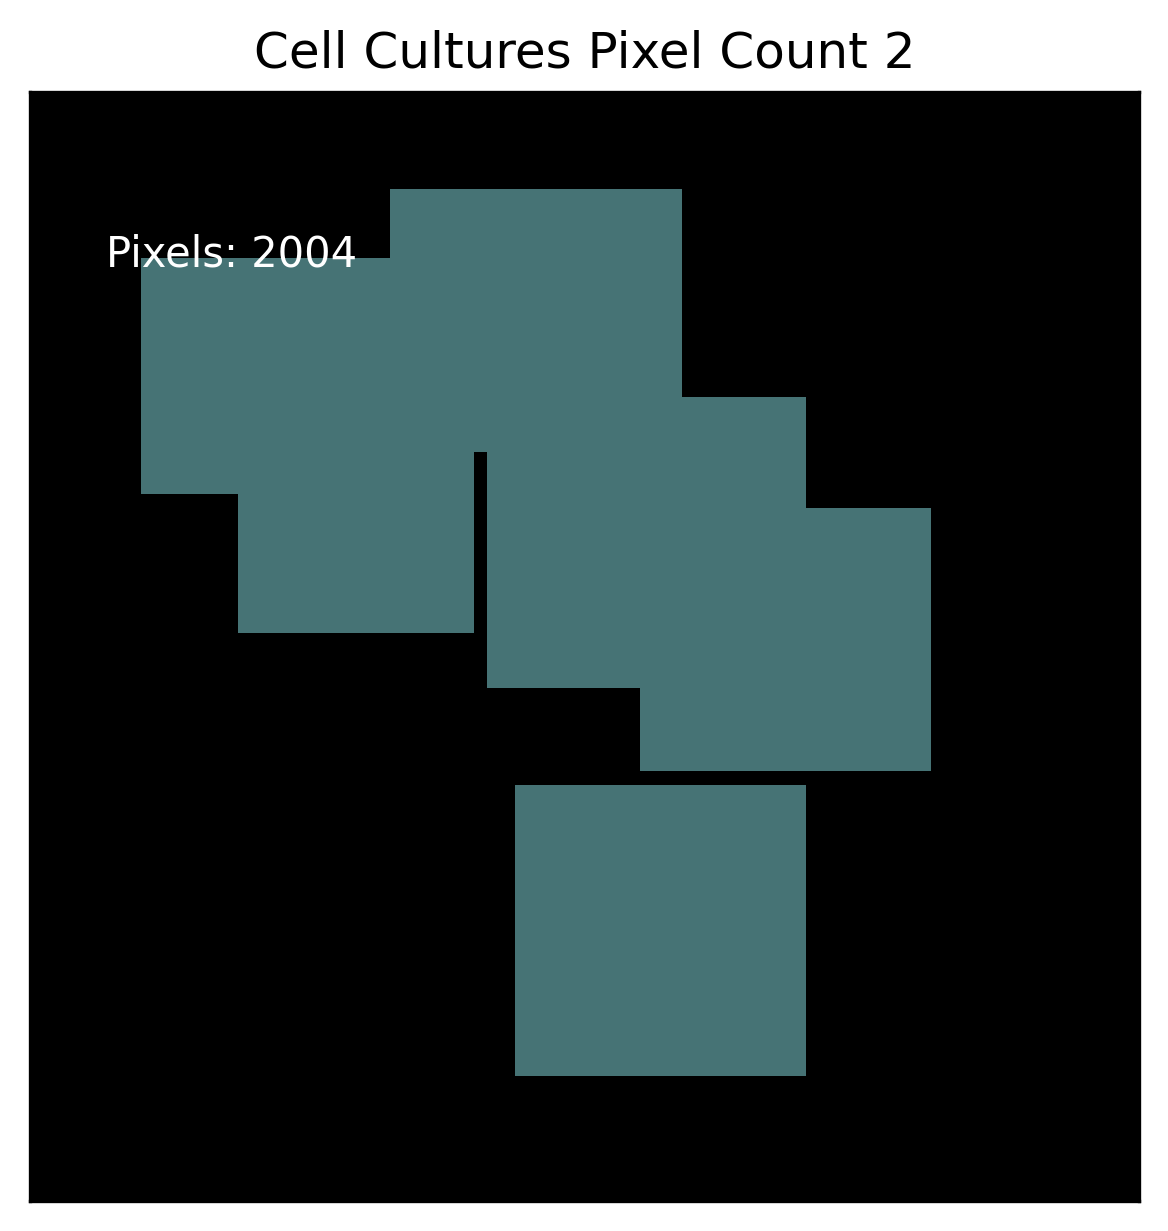

</a>

</td>

<td>


<a download="cell_cultures_pixels_3.png" href="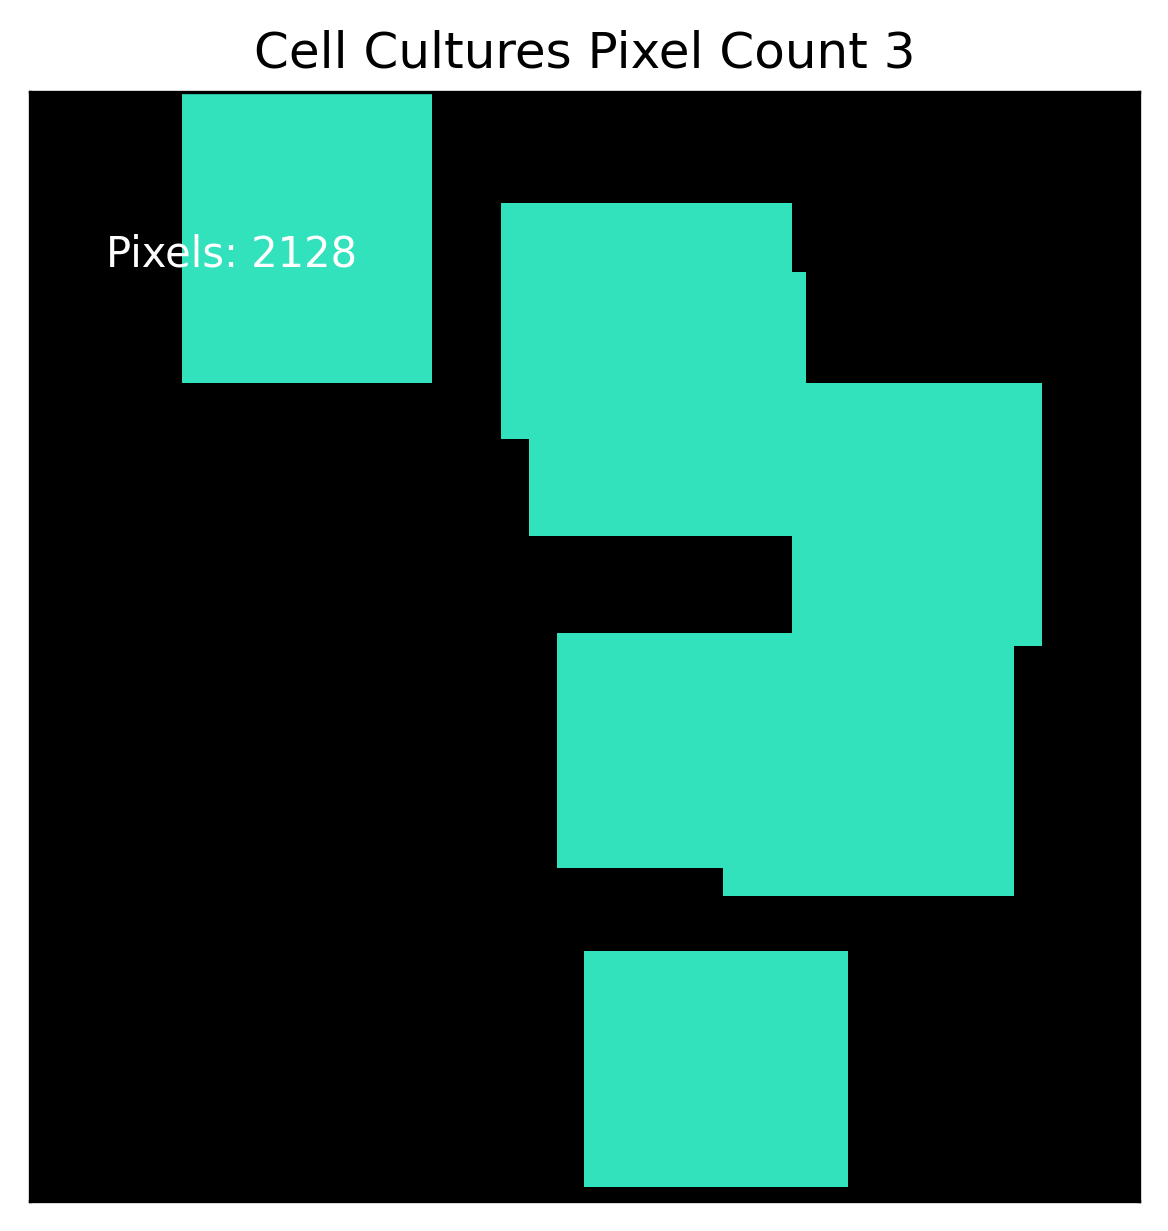">


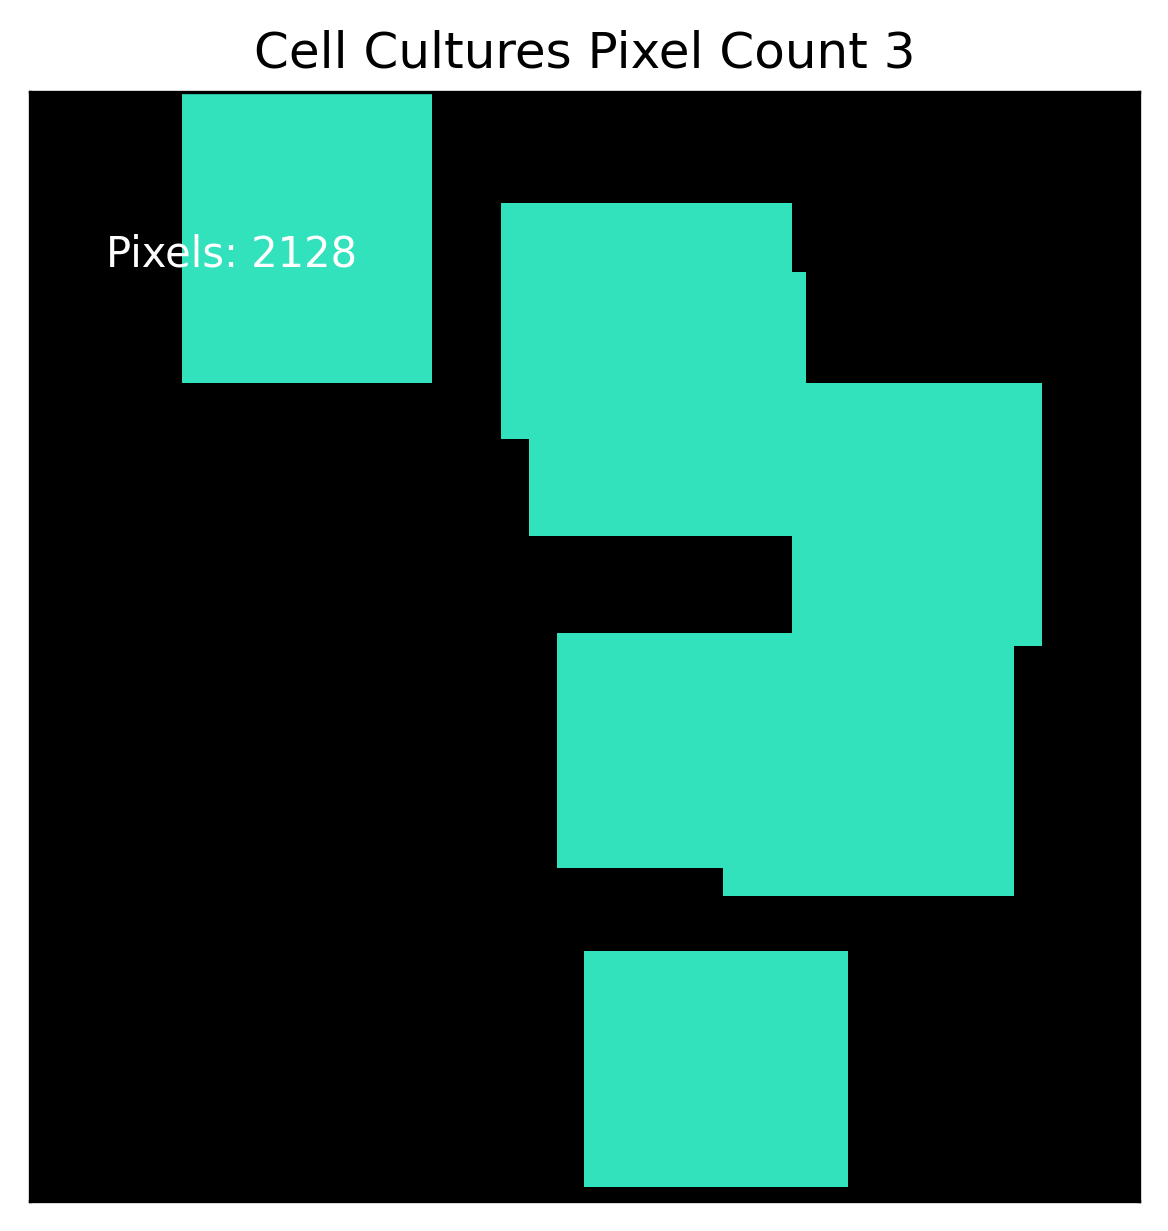

</a>

</td>

</tr>

<tr>

<td>
Pixel Count: 2289
</td>

<td>
Pixel Count: 2004
</td>

<td>
Pixel Count: 2128
</td>

</tr>

</tbody>
</table>



<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>


<div class="question_marks">

</div><!-- end of question_marks -->


Total Cell Pixels: 218251
Number of Connected Components (Cells): 10


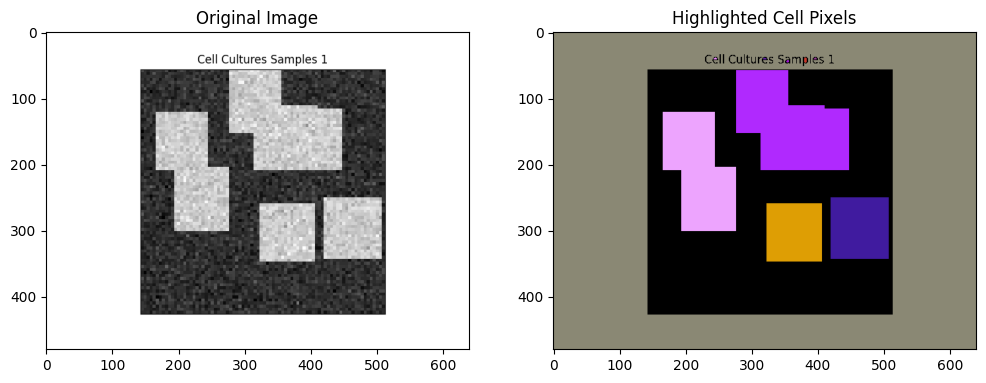

Total Cell Pixels: 212149
Number of Connected Components (Cells): 8


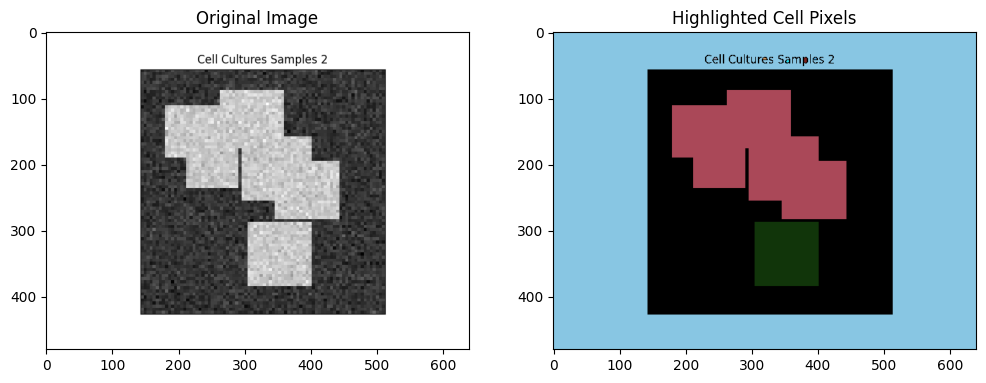

Total Cell Pixels: 214542
Number of Connected Components (Cells): 9


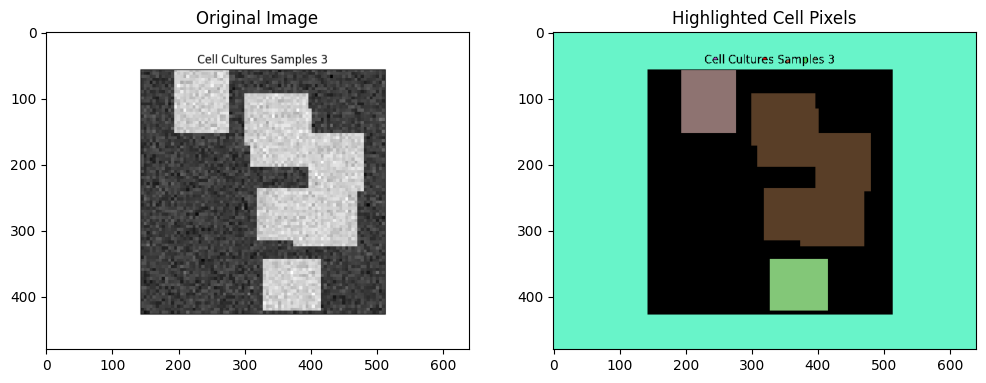

In [13]:

def analyze_cell_culture(image_path, threshold_value=128):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    _, binary = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=4)
    
    total_pixels = np.sum(binary == 255)
    
    print(f"Total Cell Pixels: {total_pixels}")
    print(f"Number of Connected Components (Cells): {num_labels - 1}")
    
    output_image = np.zeros((*labels.shape, 3), dtype=np.uint8)
    for label in range(1, num_labels):
        output_image[labels == label] = np.random.randint(0, 255, size=3)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].imshow(output_image)
    ax[1].set_title("Highlighted Cell Pixels")
    plt.show()

image_path1 = '/home/xgang/XGang/Graduation/First_Year/Computer-Vision/Final_Exam/computer_vision_final_exam_2024_2_3725203-main/Resources/cell_cultures_1.png'
image_path2 = '/home/xgang/XGang/Graduation/First_Year/Computer-Vision/Final_Exam/computer_vision_final_exam_2024_2_3725203-main/Resources/cell_cultures_2.png'
image_path3 = '/home/xgang/XGang/Graduation/First_Year/Computer-Vision/Final_Exam/computer_vision_final_exam_2024_2_3725203-main/Resources/cell_cultures_3.png'
analyze_cell_culture(image_path1)
analyze_cell_culture(image_path2)
analyze_cell_culture(image_path3)

<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

1.Grayscale Conversion: Ensures the image is in grayscale format.
2.Thresholding: Separates bright cell pixels from the dark background based on a chosen threshold value.
3.Connected Components Analysis:
    Identifies clusters of connected pixels (4-connectivity ensures no diagonal connections).
    Counts the total number of connected components (cells).
4.Visualization: Highlights cells with random colors for better distinction.


<h1>Cell Detection and Analysis - Cells Counts and Area</h1>
<div class="question_body">


<p>You are relieved that you found a suitable color predicate to
distinguish cell pixels from the background. This makes your
task much easier.</p>

<p>
Next your friend needs help to determine how many seperate cell clusters
are in the image.
Implement a program that given an image as shown in the figure above will seperate it into different cells
and counts the number of cell clusters.
</p>

<p>
Your friend also needs to know the center of each cluster (i.e., the average of all coordinates that
belong to the cluster) and the area (i.e., the number of pixels that belong to the cluster).
</p>

</div><!-- end of question_body -->



<div class="question_marks">
<span class="mark_num" style="text-align:right">15</span> marks
</div><!-- end of question_marks -->



<p>Count the number of cell clusters in an image.
The following shows the answers for the three sample images from above.</p>


<table " >

<tbody>

<tr>

<td>


<a download="cell_cultures_counts_1.png" href="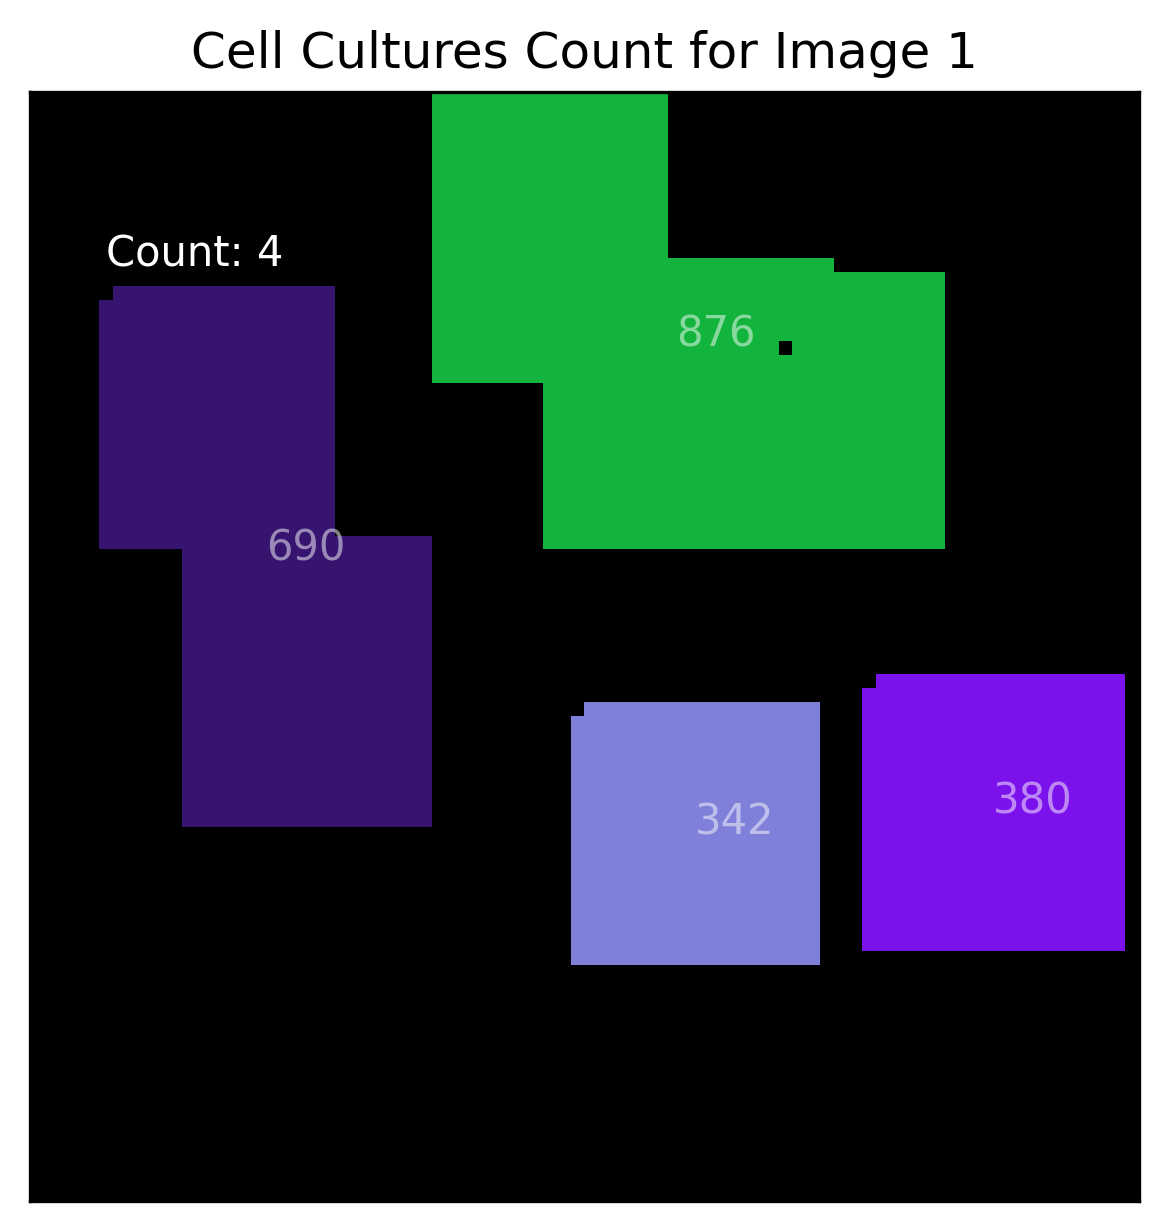">


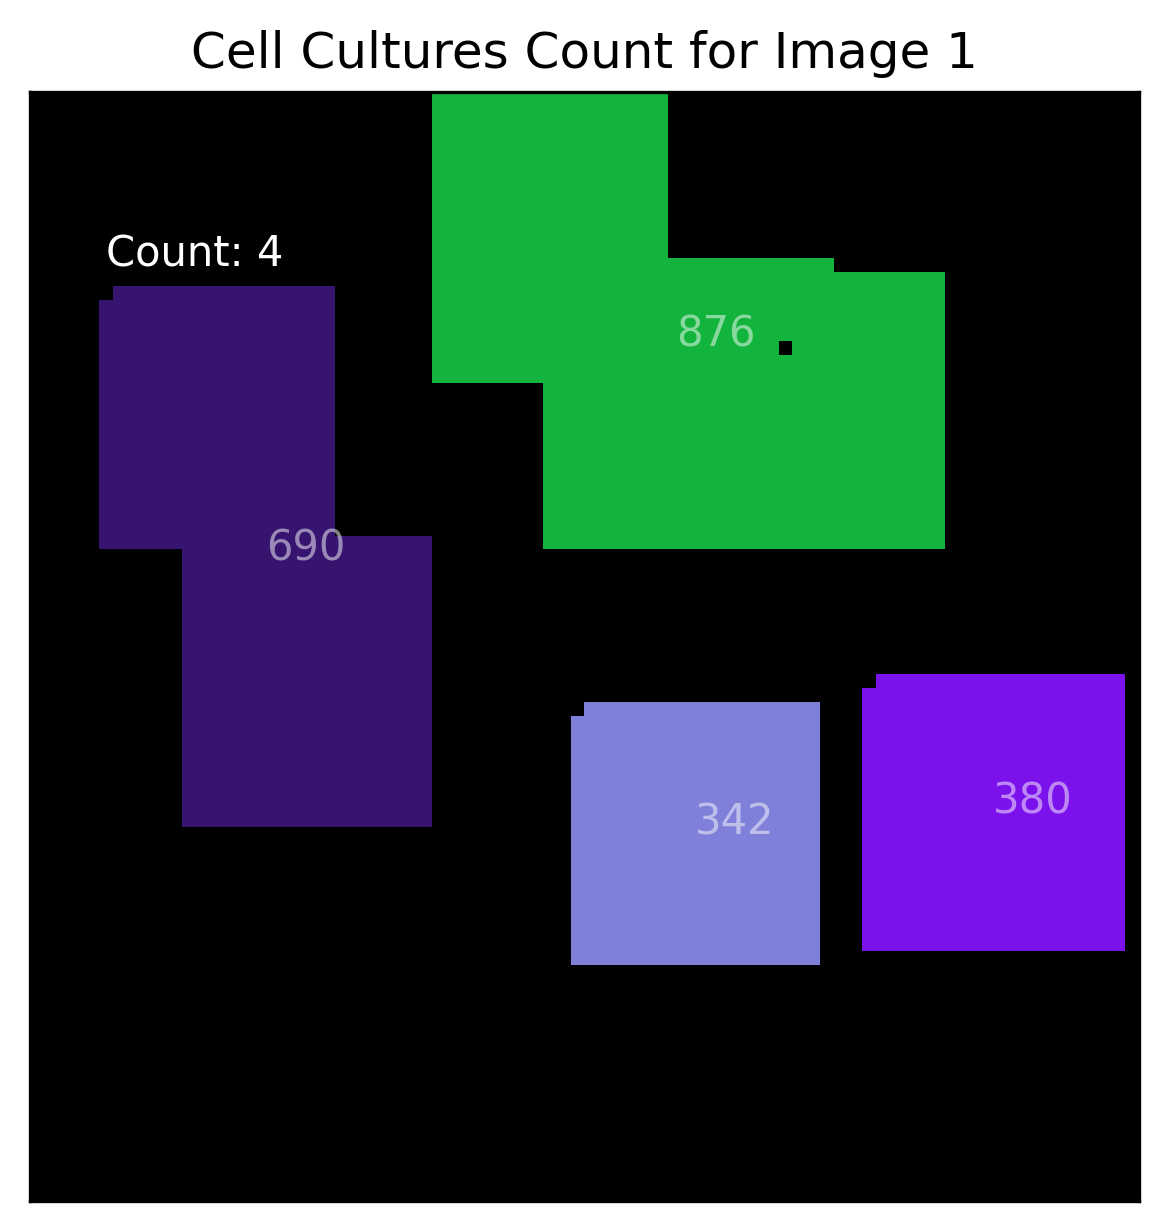

</a>

</td>

<td>


<a download="cell_cultures_counts_2.png" href="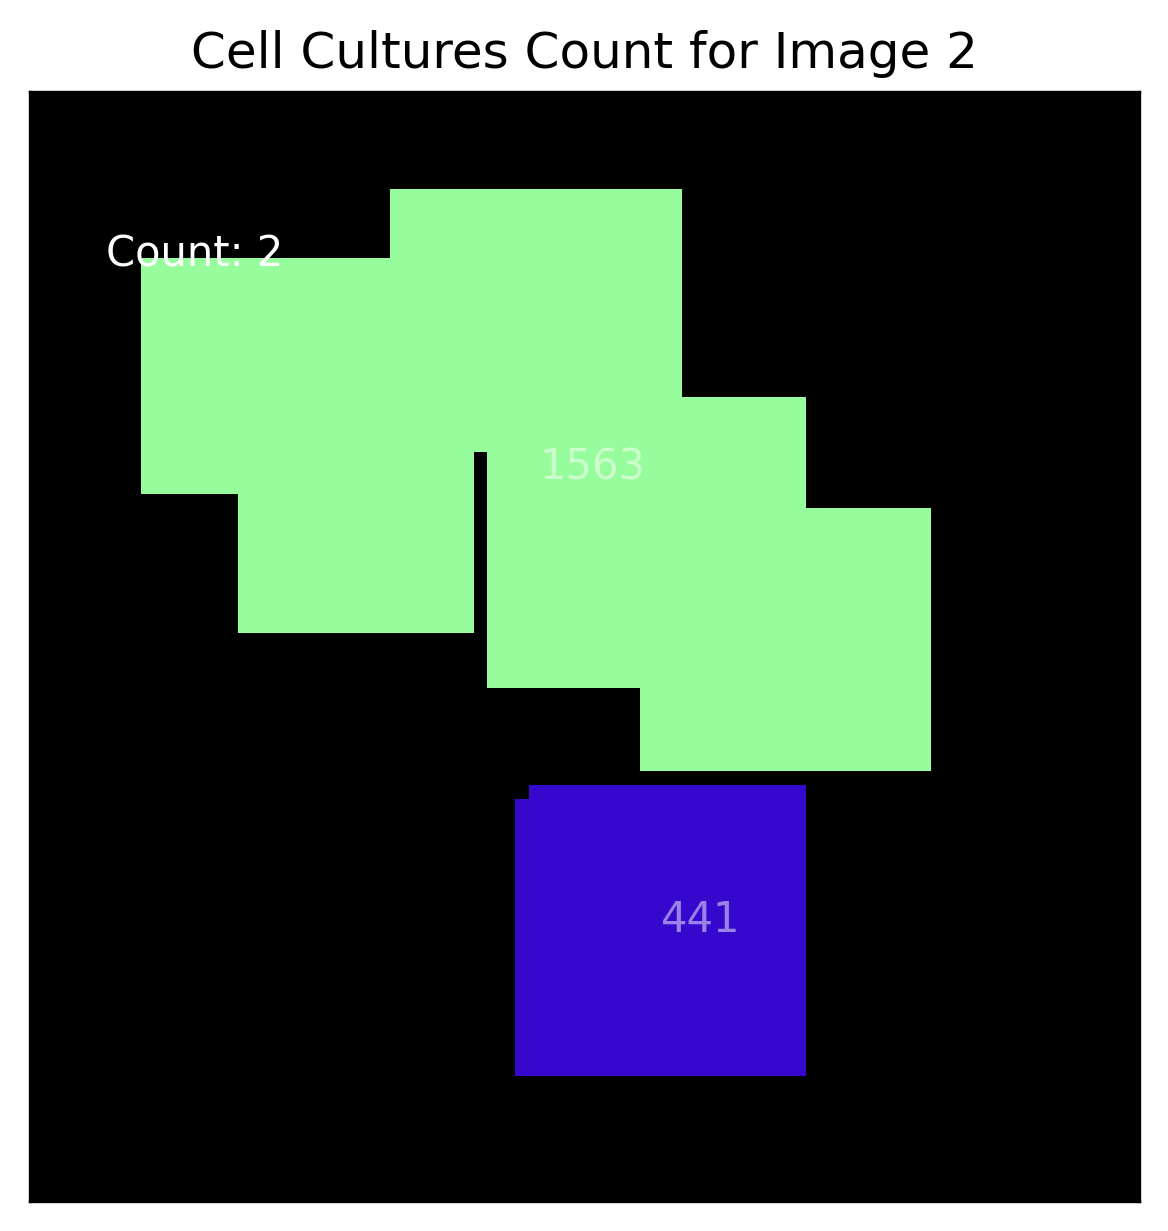">


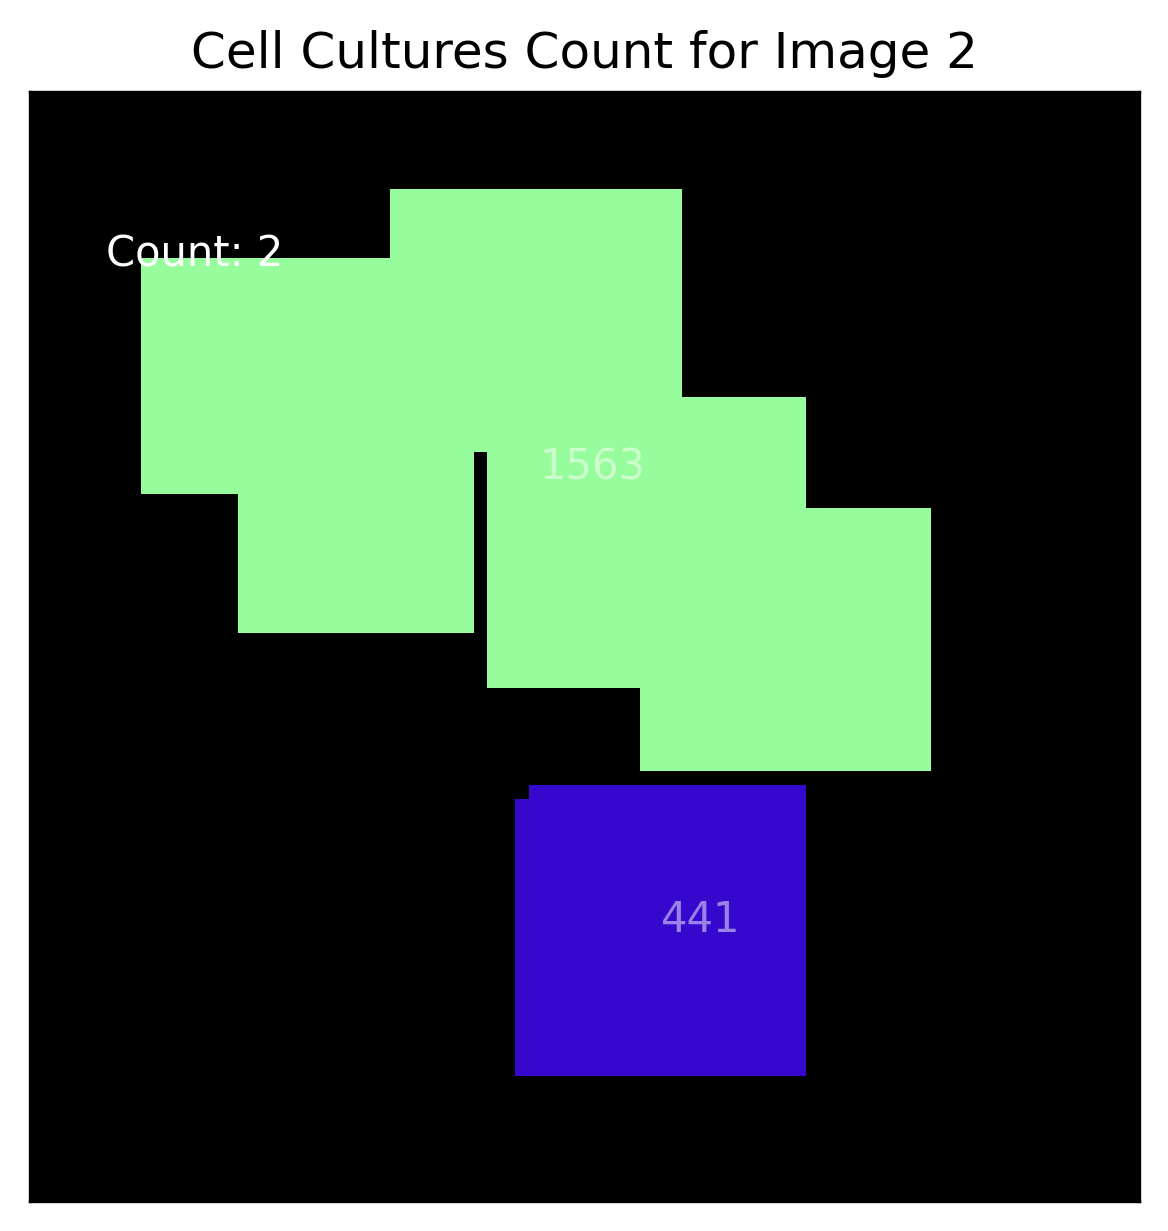

</a>

</td>

<td>


<a download="cell_cultures_counts_3.png" href="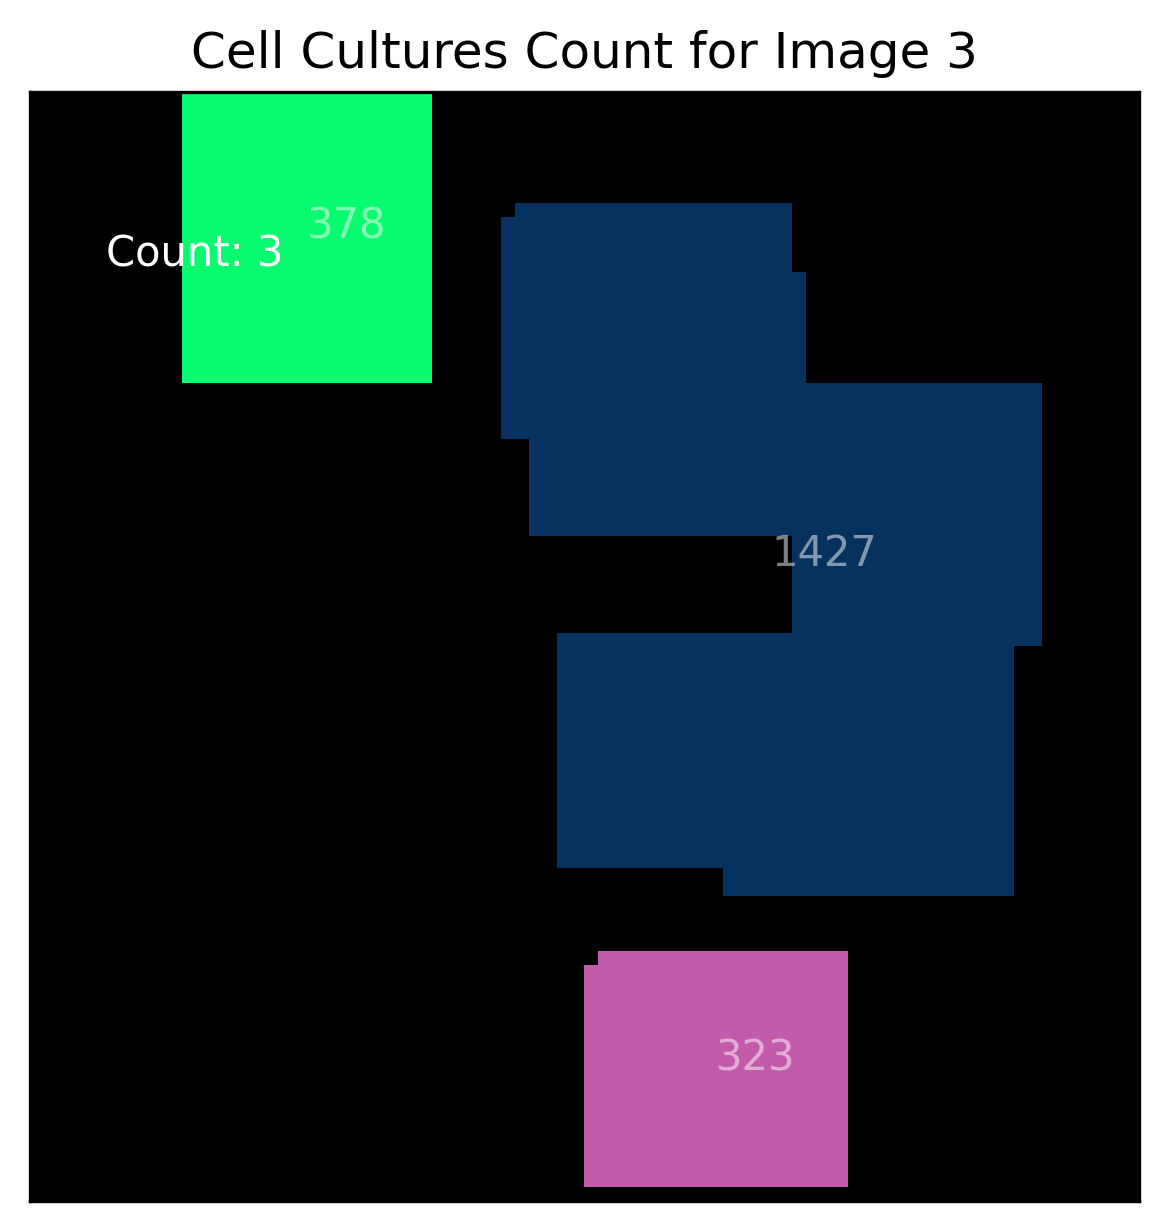">


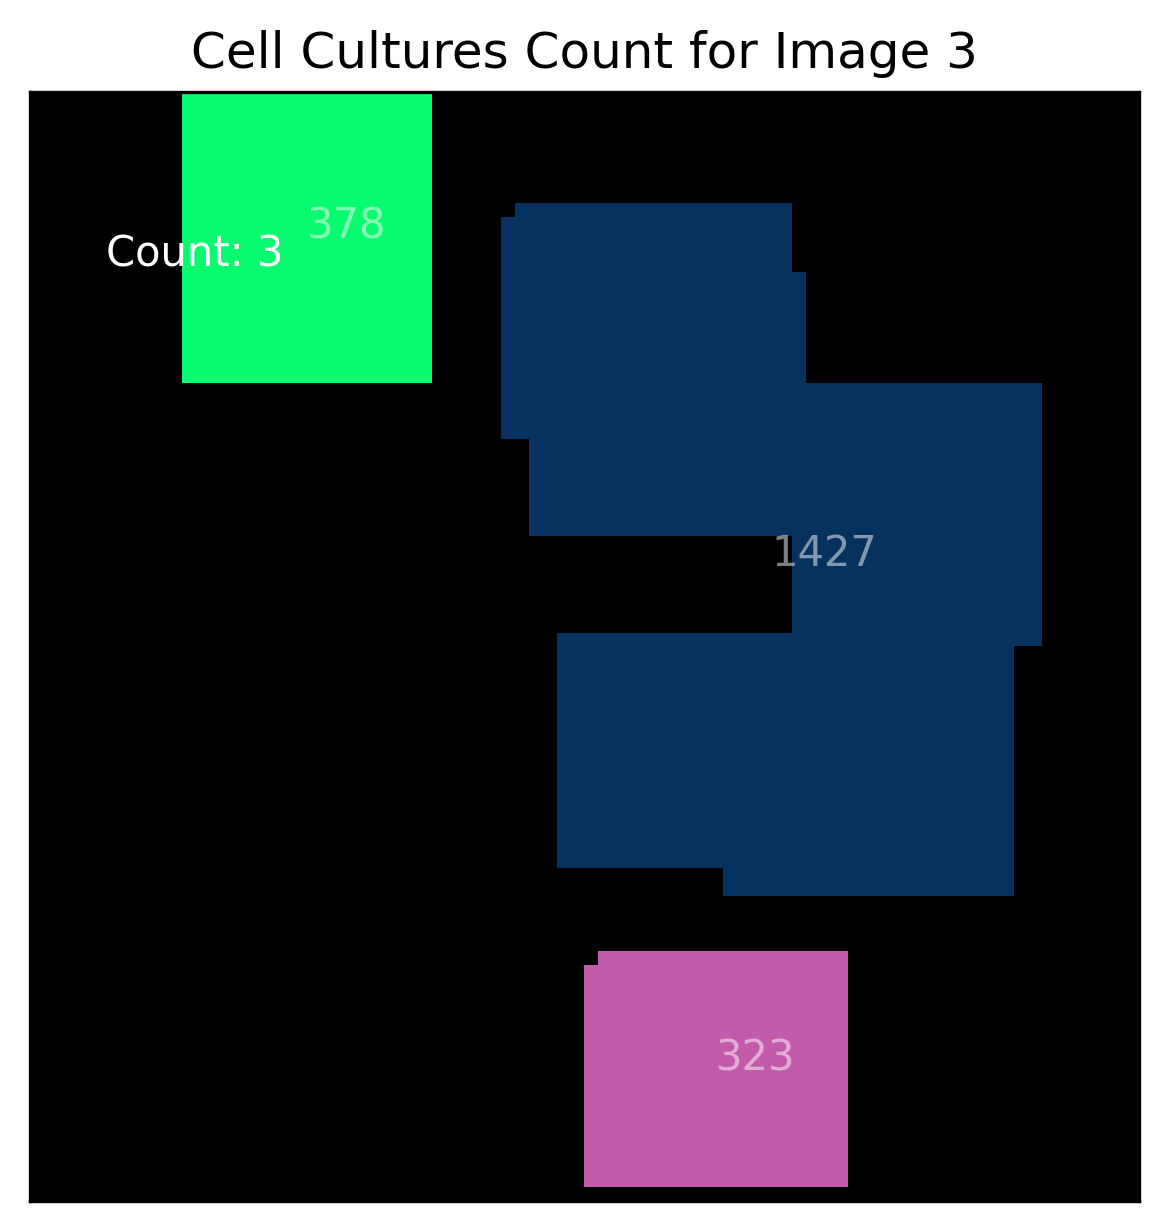

</a>

</td>

</tr>

<tr>

<td>

<table " >

<thead>
<tr>

<th>
Y
</th>

<th>
X
</th>

<th>
Area
</th>

</tr>
</thead>

<tbody>

<tr>

<td>
17.76
</td>

<td>
46.12
</td>

<td>
876.00
</td>

</tr>

<tr>

<td>
33.27
</td>

<td>
16.51
</td>

<td>
690.00
</td>

</tr>

<tr>

<td>
51.50
</td>

<td>
69.00
</td>

<td>
380.00
</td>

</tr>

<tr>

<td>
53.00
</td>

<td>
47.50
</td>

<td>
342.00
</td>

</tr>

</tbody>
</table>

</td>

<td>

<table " >

<thead>
<tr>

<th>
Y
</th>

<th>
X
</th>

<th>
Area
</th>

</tr>
</thead>

<tbody>

<tr>

<td>
27.36
</td>

<td>
36.28
</td>

<td>
1563.00
</td>

</tr>

<tr>

<td>
60.00
</td>

<td>
45.00
</td>

<td>
441.00
</td>

</tr>

</tbody>
</table>

</td>

<td>

<table " >

<thead>
<tr>

<th>
Y
</th>

<th>
X
</th>

<th>
Area
</th>

</tr>
</thead>

<tbody>

<tr>

<td>
10.00
</td>

<td>
19.50
</td>

<td>
378.00
</td>

</tr>

<tr>

<td>
33.60
</td>

<td>
53.02
</td>

<td>
1427.00
</td>

</tr>

<tr>

<td>
70.00
</td>

<td>
49.00
</td>

<td>
323.00
</td>

</tr>

</tbody>
</table>

</td>

</tr>

</tbody>
</table>



<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>


<div class="question_marks">

</div><!-- end of question_marks -->


Total Number of Cell Clusters in Black Block: 4
Cluster    Center X   Center Y   Area      
1          358.46     141.72     18688     
2          221.14     212.55     14748     
3          463.50     297.00     8184      
4          364.50     303.50     7392      


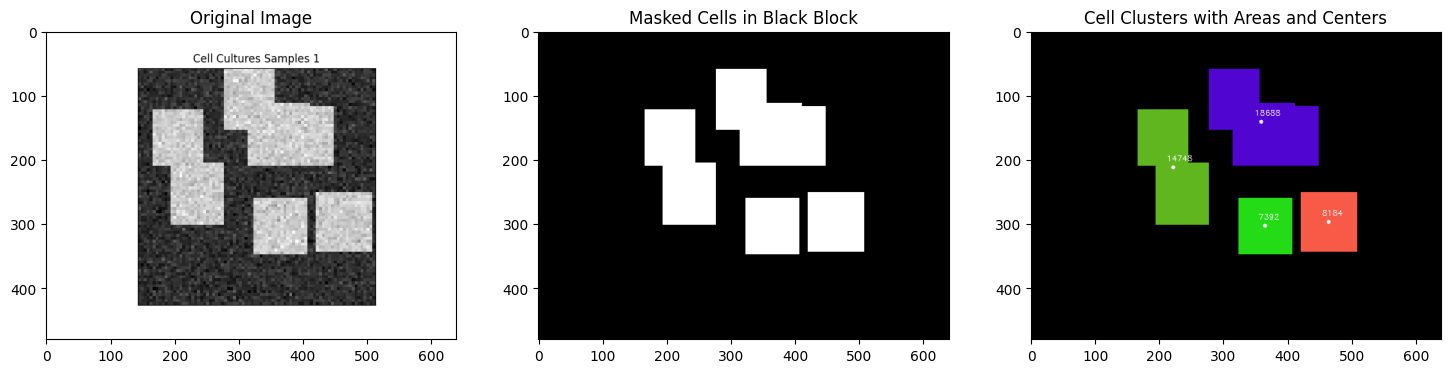

Total Number of Cell Clusters in Black Block: 2
Cluster    Center X   Center Y   Area      
1          312.64     185.36     33513     
2          353.00     336.00     9409      


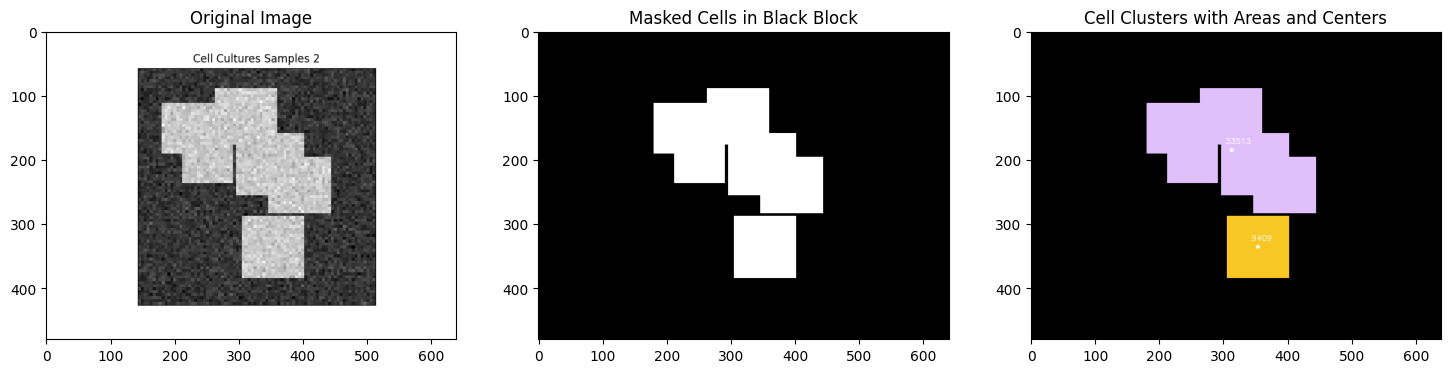

Total Number of Cell Clusters in Black Block: 3
Cluster    Center X   Center Y   Area      
1          235.00     106.00     7885      
2          389.95     213.96     30567     
3          371.50     382.50     6864      


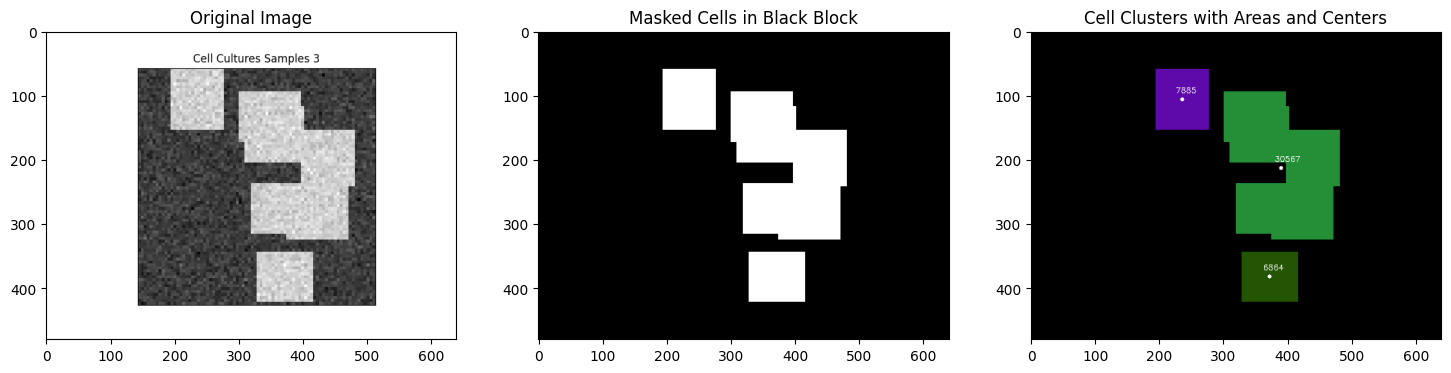

In [23]:

def count_cells_in_black_block(image_path, threshold_value=128):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    _, block_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(block_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    largest_contour = max(contours, key=cv2.contourArea)
    black_block_mask = np.zeros_like(image)
    cv2.drawContours(black_block_mask, [largest_contour], -1, 255, -1)
    
    _, cell_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    masked_cells = cv2.bitwise_and(cell_mask, black_block_mask)
    
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(masked_cells, connectivity=4)
    
    print(f"Total Number of Cell Clusters in Black Block: {num_labels - 1}")
    print(f"{'Cluster':<10} {'Center X':<10} {'Center Y':<10} {'Area':<10}")
    output_image = np.zeros((*labels.shape, 3), dtype=np.uint8)
    
    for i in range(1, num_labels):
        center_x, center_y = centroids[i]
        area = stats[i, cv2.CC_STAT_AREA]
        print(f"{i:<10} {center_x:<10.2f} {center_y:<10.2f} {area:<10}")
        output_image[labels == i] = np.random.randint(0, 255, size=3)
        cv2.circle(output_image, (int(center_x), int(center_y)), 3, (255, 255, 255), -1)
        cv2.putText(output_image, f"{area}", (int(center_x) - 10, int(center_y) - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].imshow(masked_cells, cmap='gray')
    ax[1].set_title("Masked Cells in Black Block")
    ax[2].imshow(output_image)
    ax[2].set_title("Cell Clusters with Areas and Centers")
    plt.show()

count_cells_in_black_block(image_path1)
count_cells_in_black_block(image_path2)
count_cells_in_black_block(image_path3)

<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

1.Black Block Detection:
    Use cv2.findContours to identify the largest black region in the image.
    Create a mask to isolate this black block.
2.Cell Detection Within Block:
    Combine the cell mask (thresholded bright areas) with the black block mask using bitwise operations.
3.Connected Component Analysis:
    Analyze only the masked region to count cell clusters, calculate centroids, and measure areas.


<h1>Estimated Runtime</h1>
<div class="question_body">

<p>
Currently, your program takes 463872.00 seconds to process an image of size 640x480 pixels.
</p>

</div><!-- end of question_body -->



<div class="question_marks">
<span class="mark_num" style="text-align:right">5</span> marks
</div><!-- end of question_marks -->



<p>
Estimate the runtime of your program if you have to process an image
of size 1280x960.
</p>

<p>Enter the answer in the box below</p>


<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

Current image size: 640×480=307,200 pixels
New image size: 1280×960=1,228,800 pixels
The scaling factor is: 1228800/307200 = 4
current runtime = 463872s
new runtime = 463872x4 = 1855488s


<h1>Cell Detection and Analysis - Cell Perimeter</h1>
<div class="question_body">

<p>
Next time you need your friend, he tells you that his professor now wants to know the
length of the perimeter of each cell cluster.</p>
<p>
The professor tells your student that a pixel belongs to the perimeter of a cell
cluster if it has at least one neighboring pixel (left, right, up, or down) that does not
belong to the cluster.
</p>

<p>
You tell your friend that you are not sure what to do if a cell cluster has a whole
inside. Your friend tells you that you should count cells that are along the perimeter
of a hole should also be included in the perimeter calculation.
</p>

<p>
The perimeters for the sample images are shown in the figure below.
</p>


<table " >

<tbody>

<tr>

<td>


<a download="cell_cultures_perimeter_1.png" href="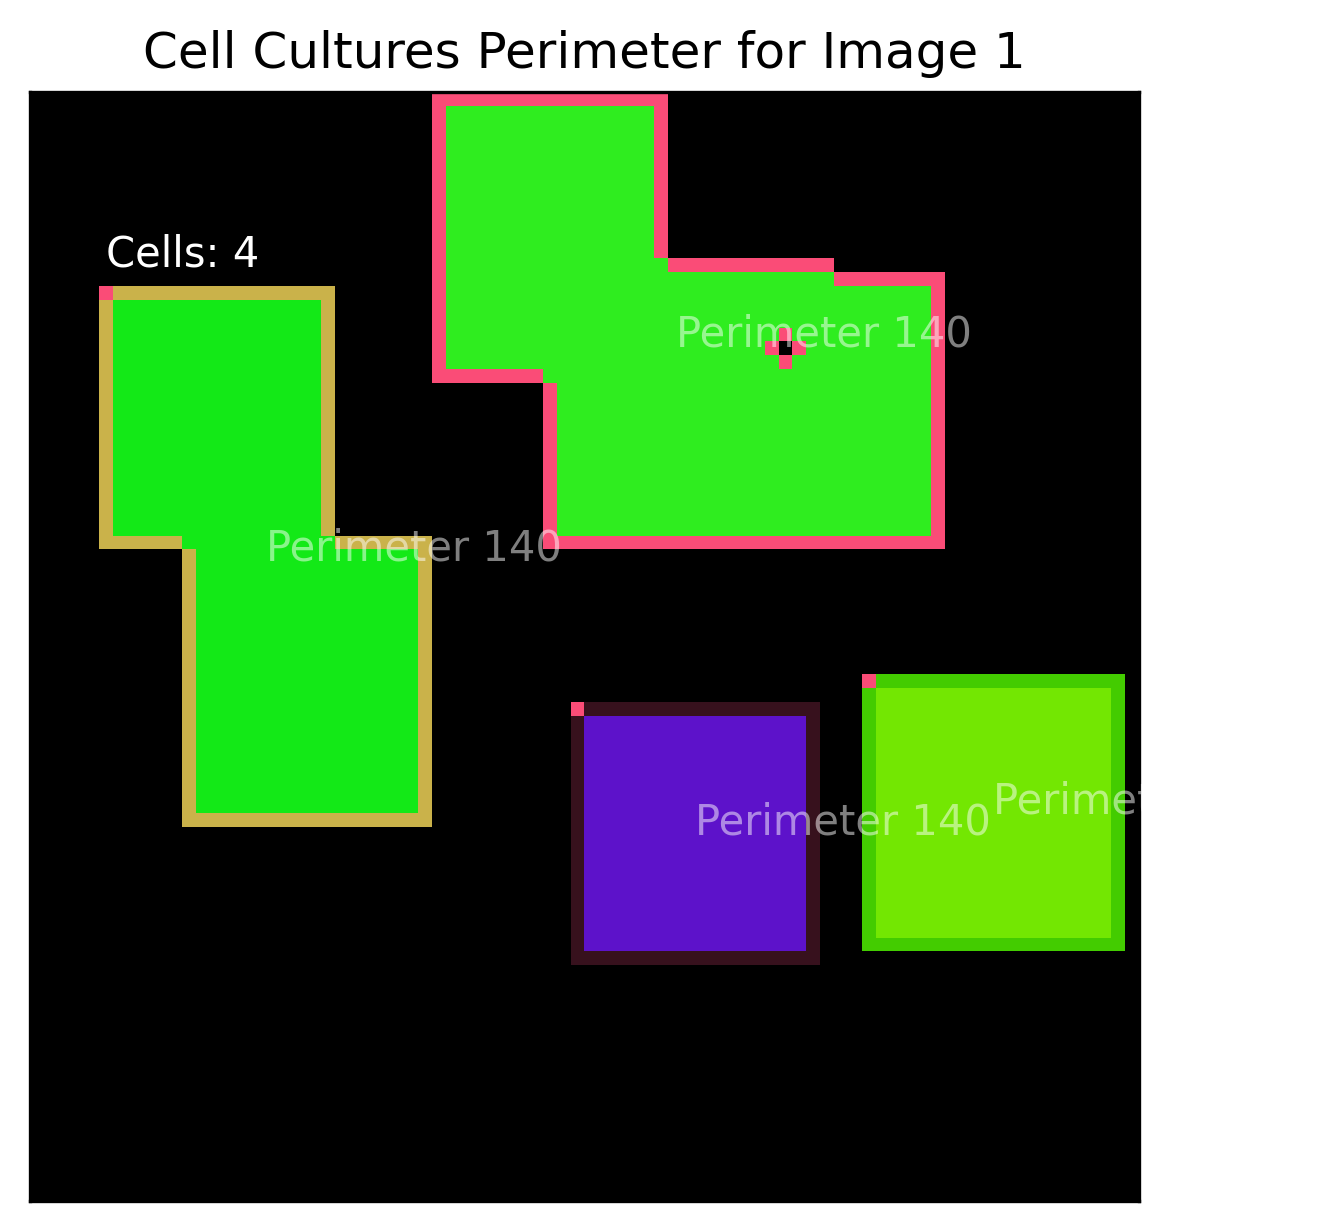">


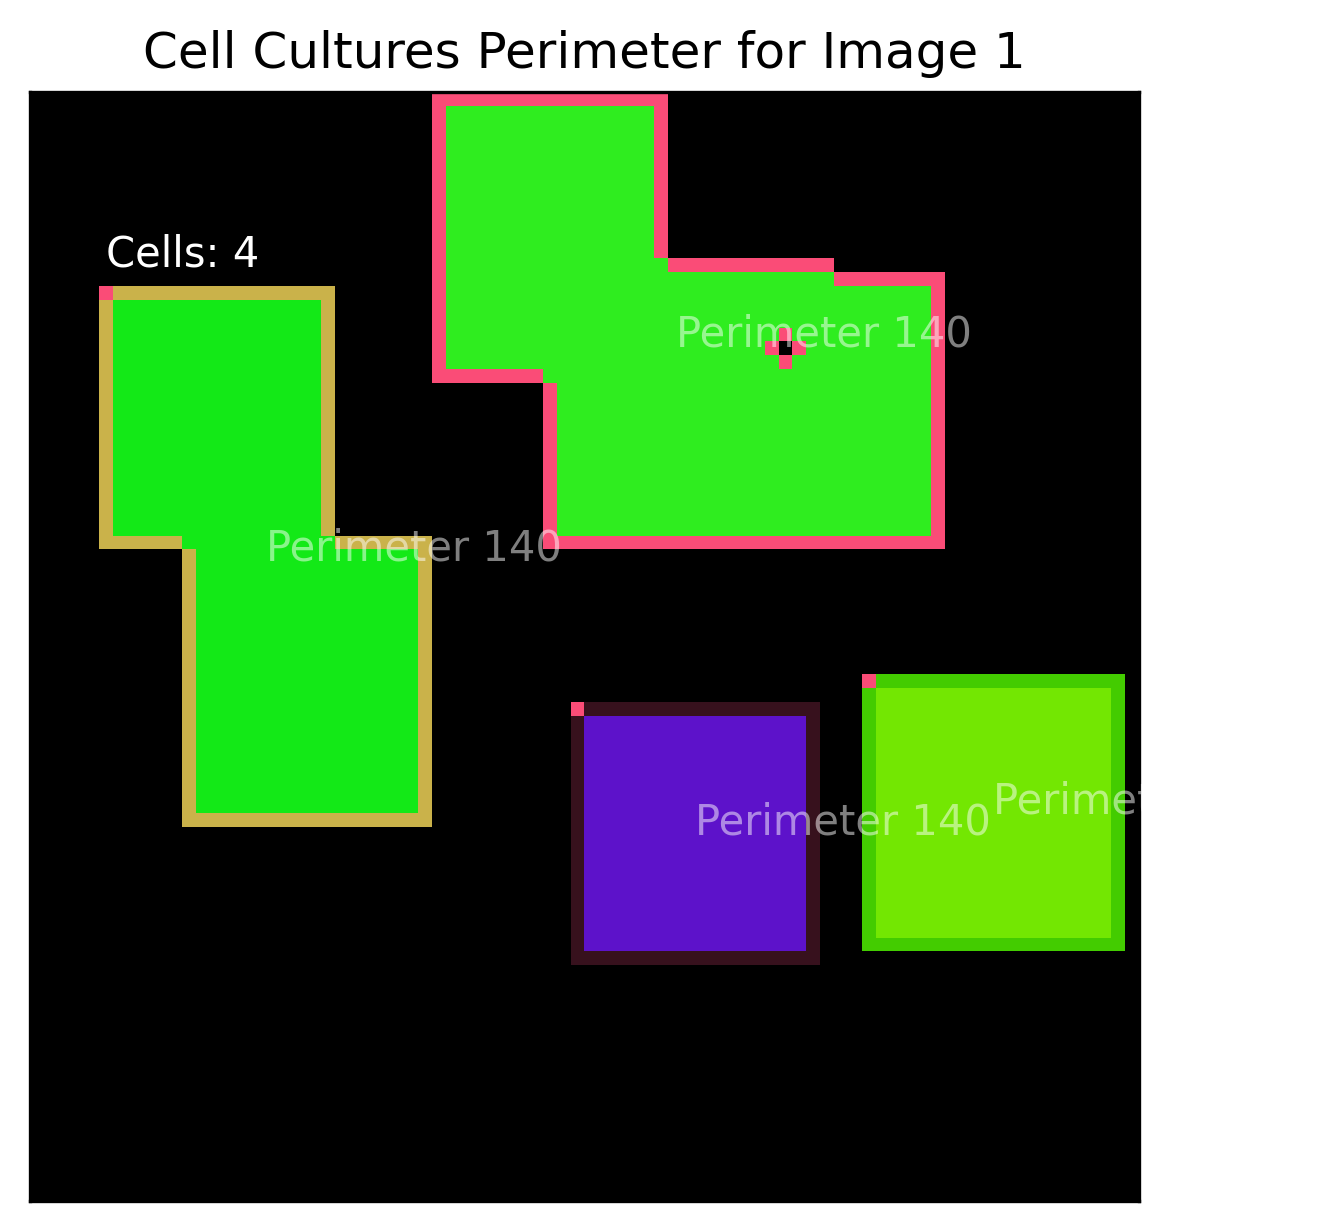

</a>

</td>

<td>


<a download="cell_cultures_perimeter_2.png" href="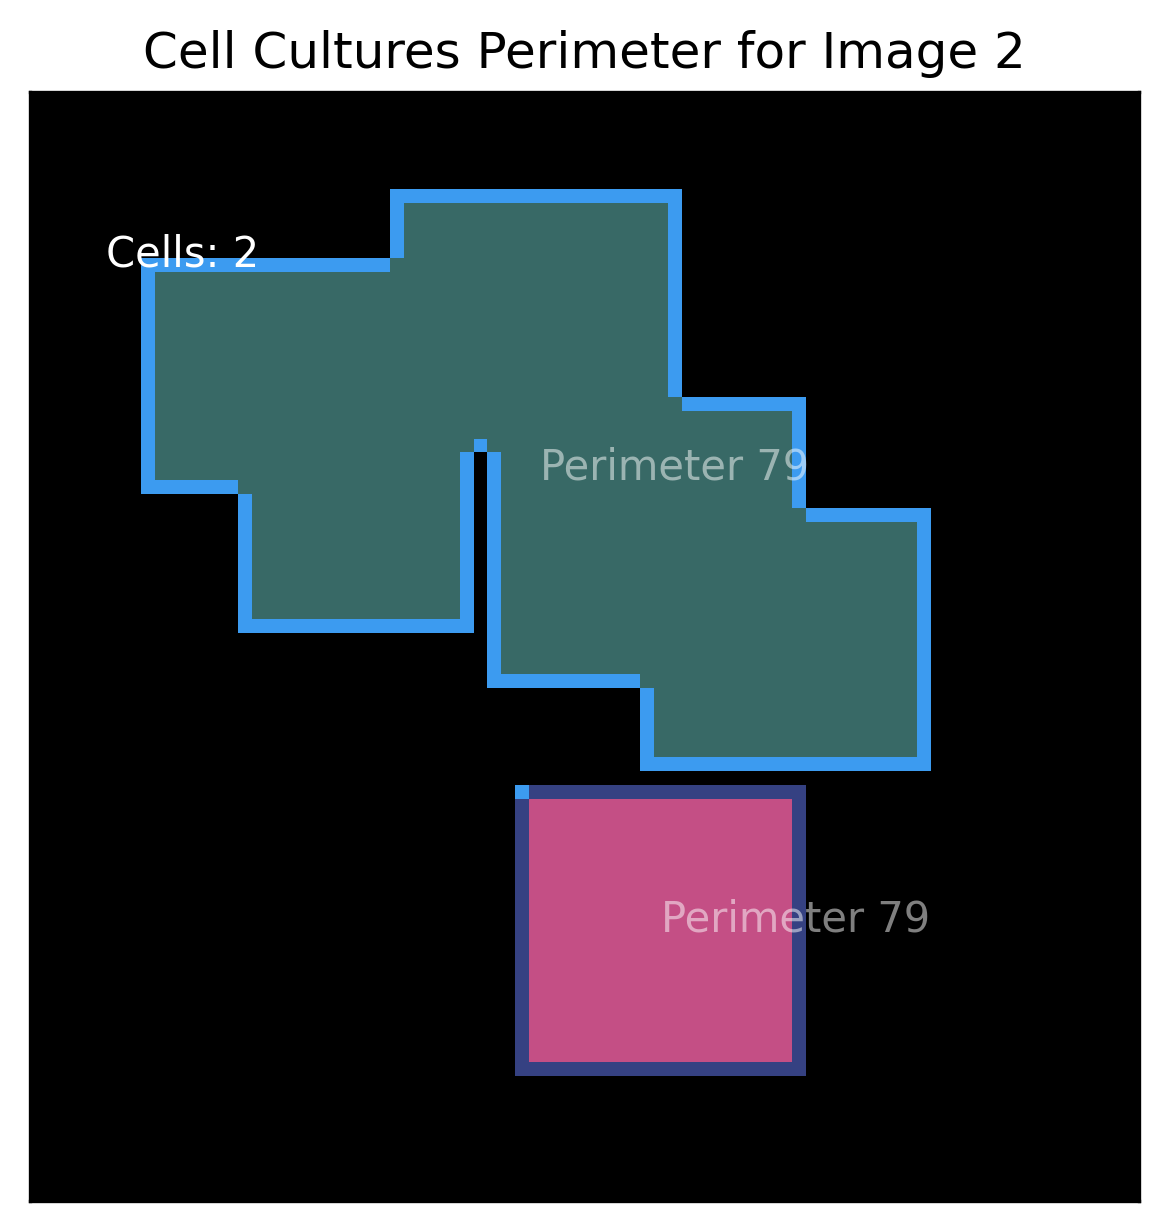">


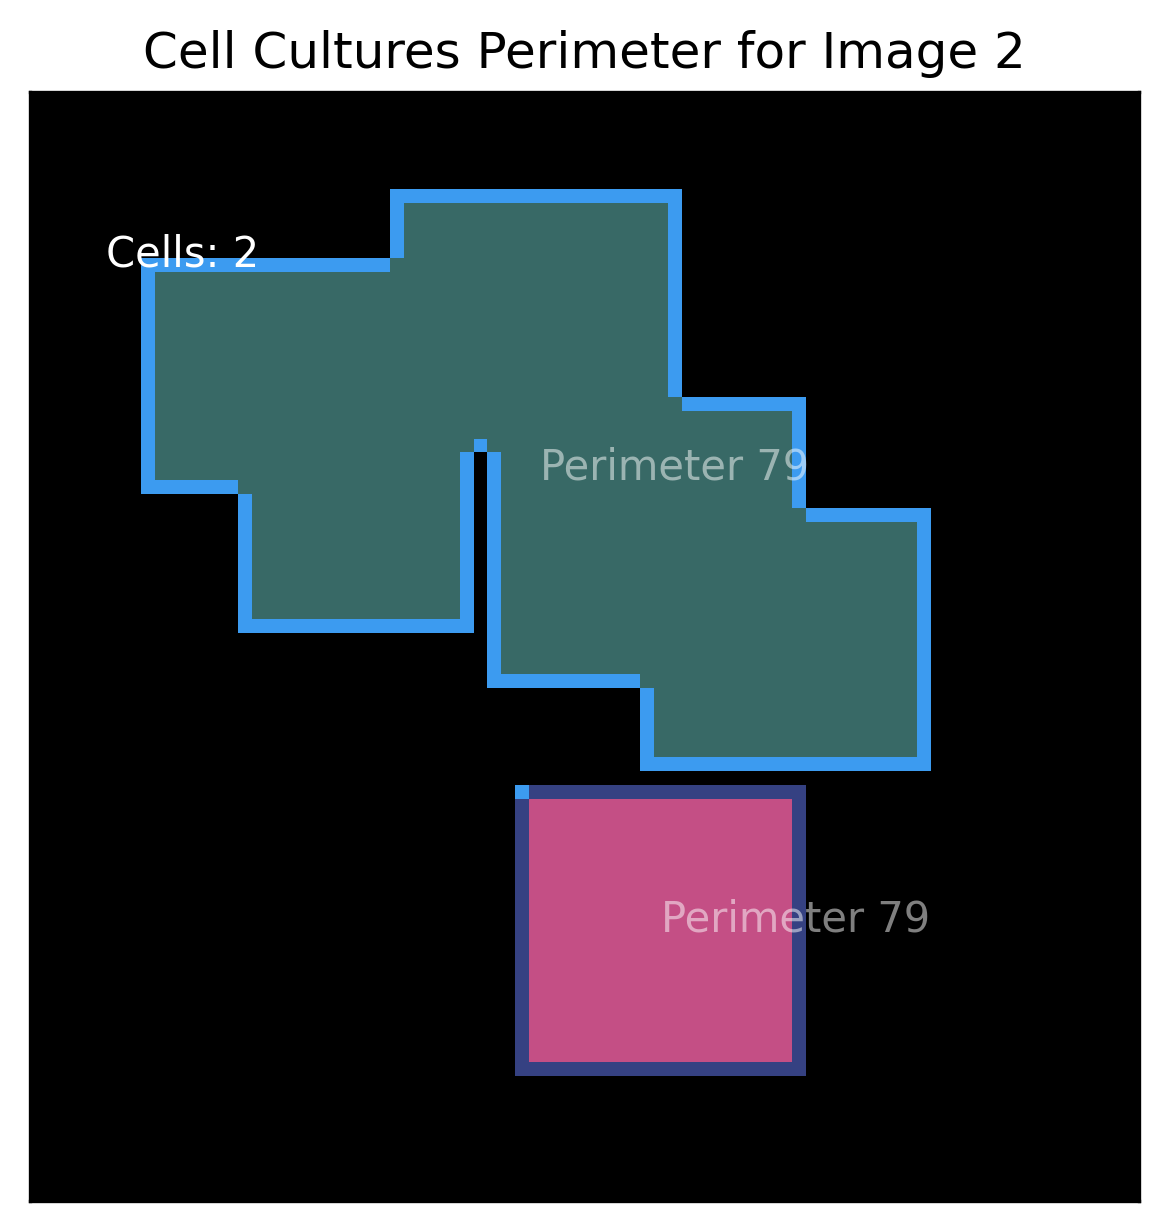

</a>

</td>

<td>


<a download="cell_cultures_perimeter_3.png" href="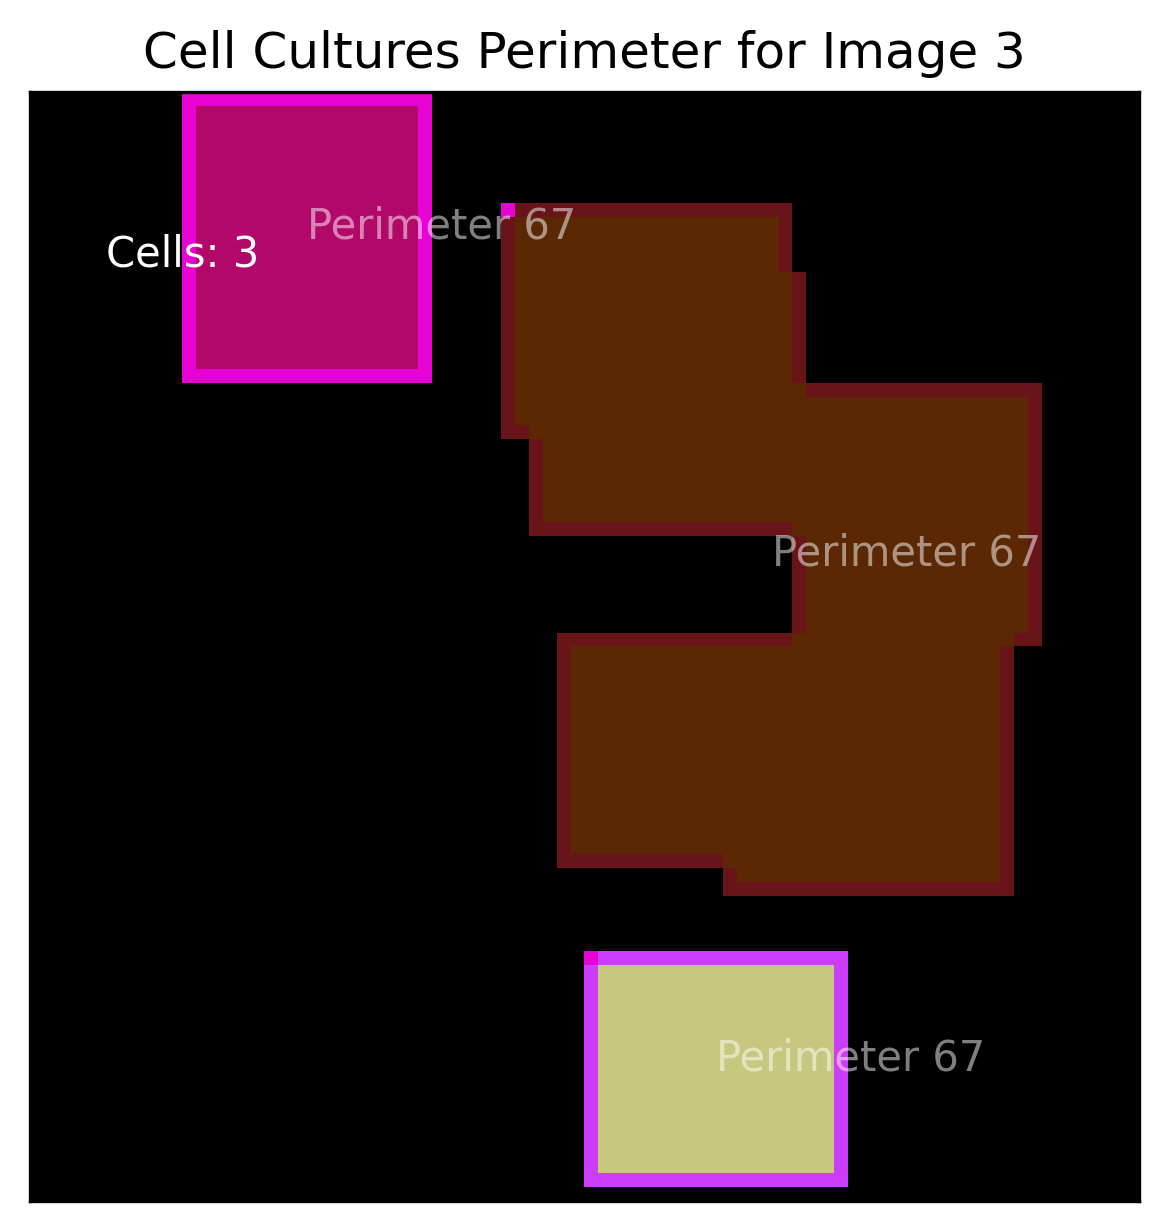">


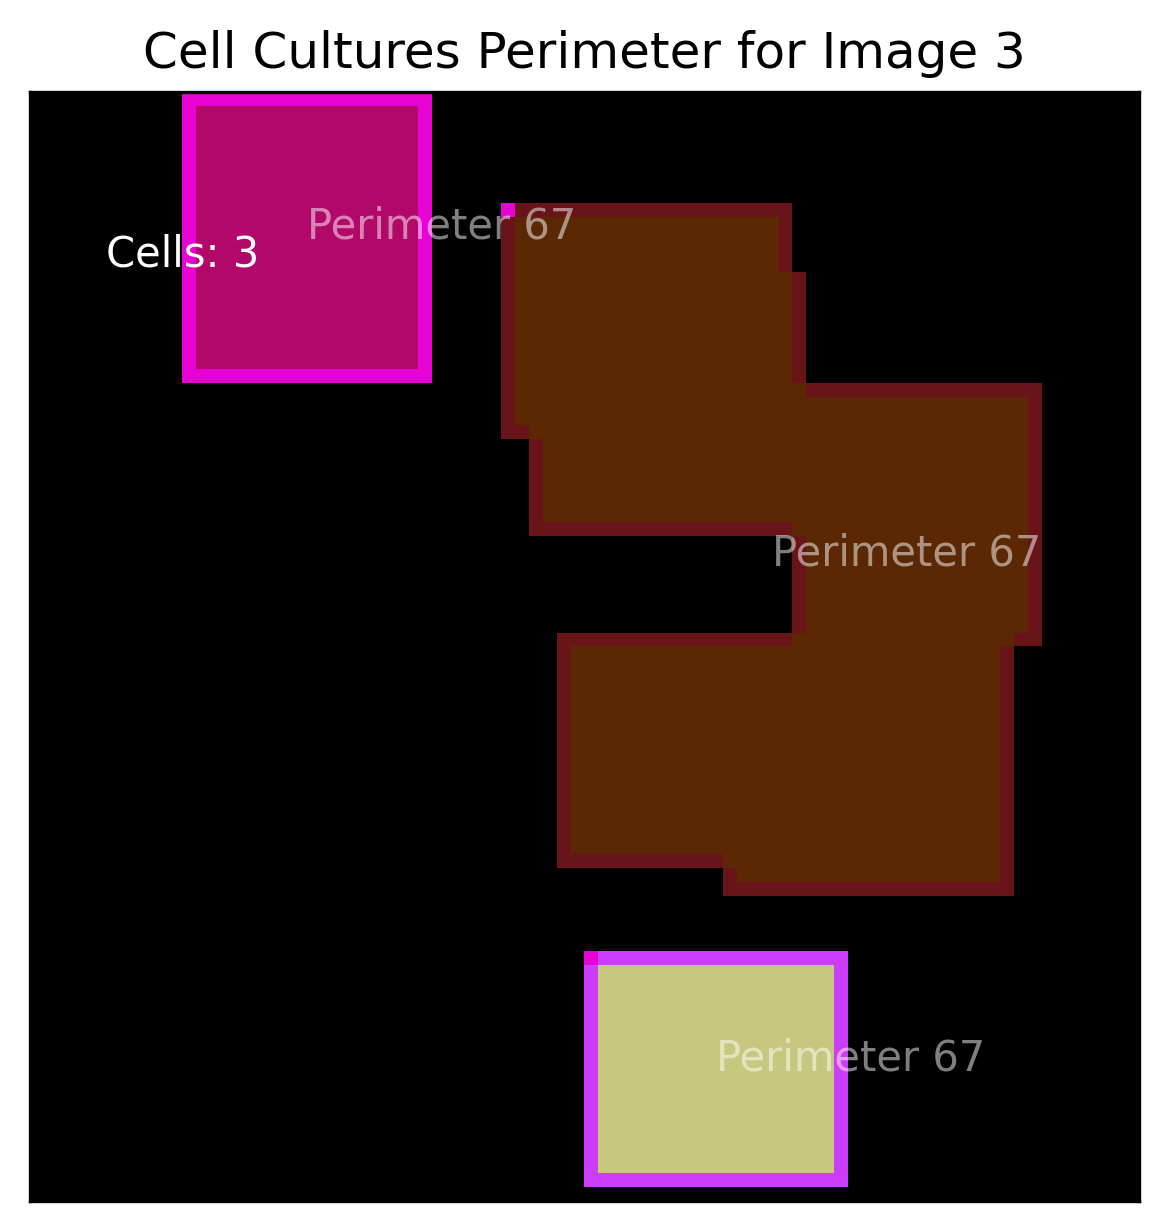

</a>

</td>

</tr>

<tr>

<td>

<table " >

<thead>
<tr>

<th>
Perimeter
</th>

</tr>
</thead>

<tbody>

<tr>

<td>
140
</td>

<td>
119
</td>

<td>
73
</td>

<td>
69
</td>

</tr>

</tbody>
</table>

</td>

<td>

<table " >

<thead>
<tr>

<th>
Perimeter
</th>

</tr>
</thead>

<tbody>

<tr>

<td>
214
</td>

<td>
79
</td>

</tr>

</tbody>
</table>

</td>

<td>

<table " >

<thead>
<tr>

<th>
Perimeter
</th>

</tr>
</thead>

<tbody>

<tr>

<td>
76
</td>

<td>
200
</td>

<td>
67
</td>

</tr>

</tbody>
</table>

</td>

</tr>

</tbody>
</table>


</div><!-- end of question_body -->



<div class="question_marks">
<span class="mark_num" style="text-align:right">20</span> marks
</div><!-- end of question_marks -->


Total Cell Clusters in Black Block: 4
Cell       Perimeter 
1          1288      
2          1164      
3          724       
4          688       


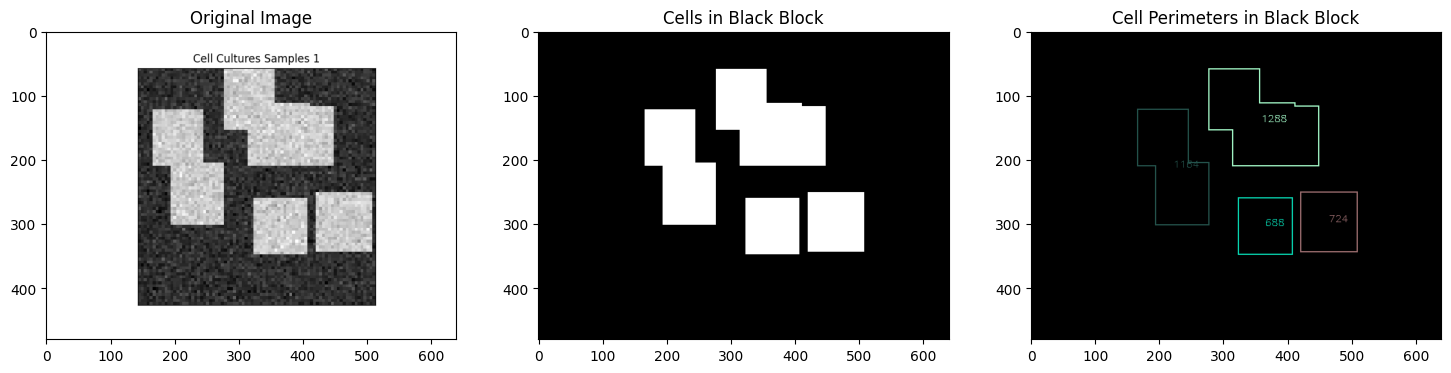

Total Cell Clusters in Black Block: 2
Cell       Perimeter 
1          2076      
2          776       


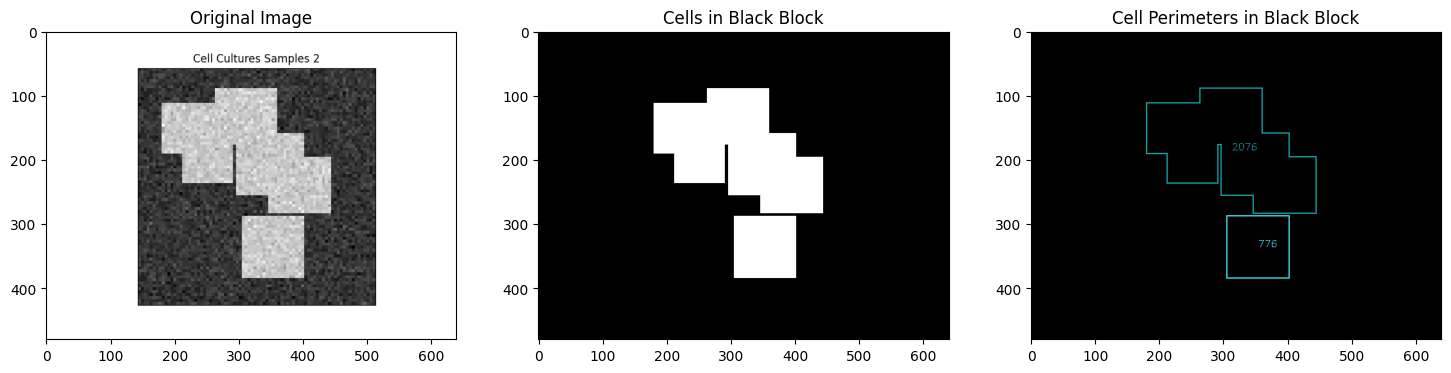

Total Cell Clusters in Black Block: 3
Cell       Perimeter 
1          712       
2          1960      
3          664       


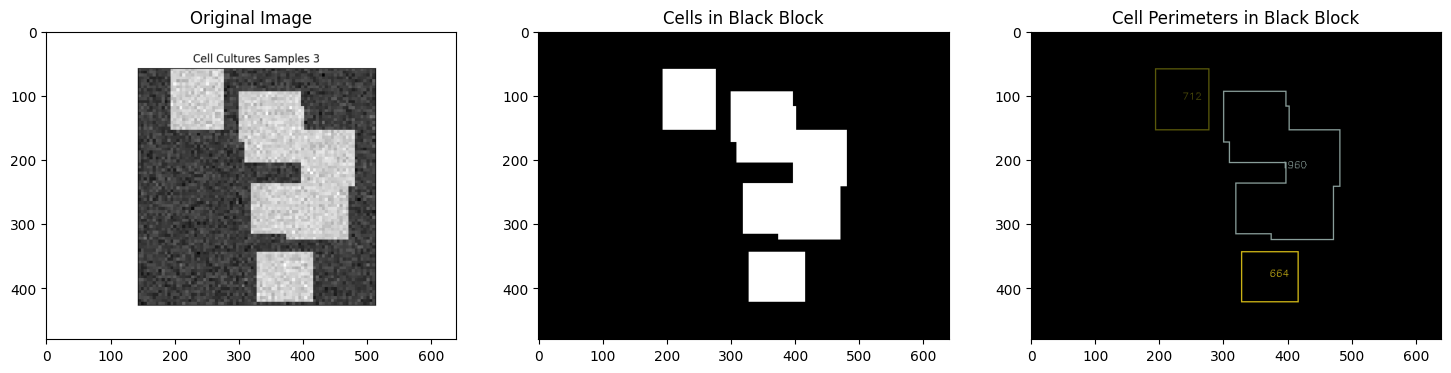

In [ ]:

def calculate_cell_perimeter_in_black_block(image_path, threshold_value=128):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, black_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(black_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    largest_contour = max(contours, key=cv2.contourArea)
    black_block_mask = np.zeros_like(image)
    cv2.drawContours(black_block_mask, [largest_contour], -1, 255, -1)

    _, cell_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    masked_cells = cv2.bitwise_and(cell_mask, black_block_mask)

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(masked_cells, connectivity=4)
    
    print(f"Total Cell Clusters in Black Block: {num_labels - 1}")
    print(f"{'Cell':<10} {'Perimeter':<10}")

    output_image = np.zeros((*masked_cells.shape, 3), dtype=np.uint8)
    for i in range(1, num_labels):
        cell_cluster_mask = (labels == i).astype(np.uint8) * 255

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        perimeter_mask = cv2.morphologyEx(cell_cluster_mask, cv2.MORPH_GRADIENT, kernel)
        perimeter = np.sum(perimeter_mask > 0)

        print(f"{i:<10} {perimeter:<10}")

        color = tuple(np.random.randint(0, 255, 3).tolist())
        output_image[perimeter_mask > 0] = color

        center_x, center_y = centroids[i]
        cv2.putText(output_image, f"{perimeter}", (int(center_x), int(center_y)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].imshow(masked_cells, cmap='gray')
    ax[1].set_title("Cells in Black Block")
    ax[2].imshow(output_image)
    ax[2].set_title("Cell Perimeters in Black Block")
    plt.show()

calculate_cell_perimeter_in_black_block(image_path1)
calculate_cell_perimeter_in_black_block(image_path2)
calculate_cell_perimeter_in_black_block(image_path3)

<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

1.Black Block Detection:
    Use inverse thresholding to identify black areas.
    Extract the largest black region using contours.
2.Masking the Black Block:
    Create a mask that focuses only on the black block.
3.Cell Detection:
    Use thresholding to detect cell pixels.
    Apply the black block mask to isolate cells inside the black block.
4.Perimeter Calculation:
    Use morphological gradient to highlight the perimeter of each cell.
    Calculate the perimeter as the number of perimeter pixels.
5.Visualization:
    Original image.
    Masked cells (cells within the black block).
    Perimeters of cells displayed with annotations.


<h1>Cell Detection and Analysis - Sides</h1>
<div class="question_body">

<p>After several long nights and weekends, you implement a program that calculates the perimeter
of each cell cluster correctly.
Your friend is very impressed and you are happy that you could help him.
</p>

<p>
Unfortunately, at your next meeting, your friend has some more requests from his professor.
The professor now needs to know the number of sides, i.e., the number of straight line
segements that are needed to enclose the outside of each cell cluster.
</p>

<p>
Lucky for you, the alien cells are all aligned with either the X or the Y axis in the image.
So you only need to consider horizontal or vertical lines in the image.
</p>

<p>As previously, your friend tells you that internal holes should also be counted as
a side.</p>

</div><!-- end of question_body -->



<div class="question_marks">
<span class="mark_num" style="text-align:right">20</span> marks
</div><!-- end of question_marks -->


Cell Cluster Analysis:
Cluster    Sides     
1          4         
2          4         
3          8         
4          10        


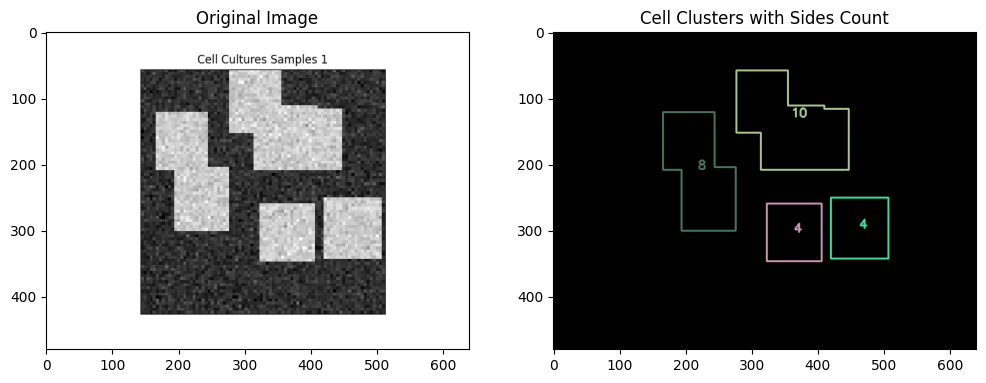

Cell Cluster Analysis:
Cluster    Sides     
1          4         
2          18        


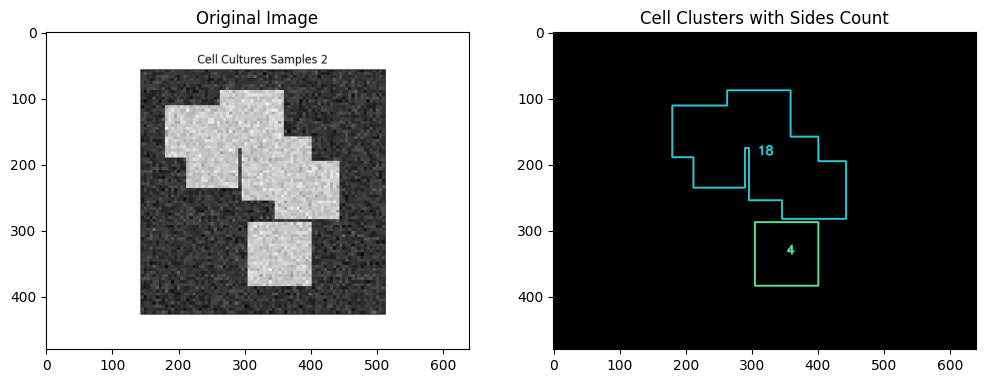

Cell Cluster Analysis:
Cluster    Sides     
1          4         
2          18        
3          4         


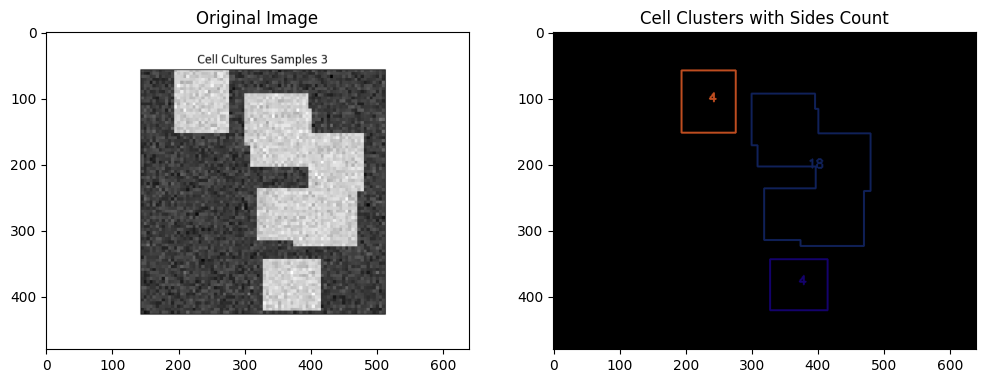

In [22]:

def calculate_cell_sides(image_path, threshold_value=128):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    _, binary = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    
    _, black_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(black_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    largest_contour = max(contours, key=cv2.contourArea)
    black_block_mask = np.zeros_like(image)
    cv2.drawContours(black_block_mask, [largest_contour], -1, 255, -1)

    masked_cells = cv2.bitwise_and(binary, black_block_mask)

    contours, hierarchy = cv2.findContours(masked_cells, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    output_image = np.zeros((*masked_cells.shape, 3), dtype=np.uint8)
    print("Cell Cluster Analysis:")
    print(f"{'Cluster':<10} {'Sides':<10}")
    
    cluster_id = 1
    for i, contour in enumerate(contours):
        if hierarchy[0][i][3] == -1:
            approx = cv2.approxPolyDP(contour, epsilon=2.0, closed=True)
            num_sides = len(approx)

            color = tuple(np.random.randint(0, 255, 3).tolist())
            cv2.drawContours(output_image, [contour], -1, color, 2)
            center_x, center_y = np.mean(contour[:, 0, :], axis=0).astype(int)
            cv2.putText(output_image, f"{num_sides}", (center_x, center_y), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
            
            print(f"{cluster_id:<10} {num_sides:<10}")
            cluster_id += 1
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].imshow(output_image)
    ax[1].set_title("Cell Clusters with Sides Count")
    plt.show()

calculate_cell_sides(image_path1)
calculate_cell_sides(image_path2)
calculate_cell_sides(image_path3)

<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

1.Detect the cells: 
    Use connected components analysis to identify each cell cluster.
2.Find contours: Use OpenCV's cv2.findContours with the cv2.RETR_CCOMP mode to detect:
    External boundaries of cell clusters.
    Internal holes (if any).
3.Count sides:
    Approximate contours using the cv2.approxPolyDP function to identify straight line segments.
    The approximation aligns with horizontal and vertical edges due to axis alignment.
4.Visualization and Results:
    Display the image with clusters and annotate the number of sides for each cluster.

<!-- </div> --><!-- end of question_frame -->
